# Introducción a la regresión lineal

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

In [1]:
# Librerías base
import numpy as np
import pandas as pd
# Funciones de densidad y muestrear de ellas
import scipy.stats as st
import scipy.special as fun
# Exportar objetos de python
import json
# MCMC
import pyjags as pj
import arviz as av
# Gráficos
from matplotlib import pyplot as plt
%matplotlib inline
import gmplot # google maps

## 1 Introducción

El modelo de regresión se ocupa de caracterizar cómo el proceso generativo asociado con una variable aleatoria $y$ varía junto con otra variable o conjunto de variables $\boldsymbol{x} = (x_1,\ldots,x_p)$.
Específicamente, un modelo de regresión especifica una forma para $p (y \mid \boldsymbol{x})$, la distribución condicional de $y$ dado $\boldsymbol{x}$.
La estimación de $p (y \mid \boldsymbol{x})$ se realiza utilizando el vector de observaciones $\boldsymbol{y} = (y_1,\ldots,y_n)$ que se recopilan bajo una variedad de condiciones $\boldsymbol{x}_1,\ldots,\boldsymbol{x}_n$, con $\boldsymbol{x}_i = (x_{i,1},\ldots,x_{i,p})$ para $i=1,\ldots,n$.

Una solución a este problema es asumir que $p (y \mid \boldsymbol{x})$ es una función *suave* de $\boldsymbol{x}$, de modo que los valores de $\boldsymbol{x}$ pueden incidir en el proceso generativo de $y$.
Un **modelo de regresión lineal** es un tipo particular de modelo para $p (y \mid \boldsymbol{x})$, el cual especifica que $\textsf{E} (y \mid \boldsymbol{x})$ tiene una forma lineal en un conjunto de parámetros $\boldsymbol{\beta} = (\beta_1,\ldots,\beta_p)$ como sigue:
$$
\textsf{E} (y \mid \boldsymbol{x}) = \int_{\mathcal{Y}} y\, p (y \mid \boldsymbol{x})\,\text{d}y = \sum_{k=1}^p \beta_k x_k = \boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}\,.
$$
El **modelo de regresión lineal Normal** especifica que la variabilidad alrededor de $\textsf{E} (y \mid \boldsymbol{x})$ surge por medio de una distribución Normal:
$$
y_i \mid \boldsymbol{x}_i,\boldsymbol{\beta},\sigma^2 \stackrel{\text {iid}}{\sim} \textsf{N}(\boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}_i,\sigma^2)
\qquad\Longleftrightarrow\qquad
y_i = \boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}_i + \epsilon_i\,,\quad\epsilon_i\mid\sigma^2\stackrel{\text {iid}}{\sim} \textsf{N}(0,\sigma^2)
$$
para $\quad i=1,\ldots,n$. Equivalentemente,
$$
\boldsymbol{y} \mid \mathbf{X},\boldsymbol{\beta},\sigma^2 \sim \textsf{N}_n(\mathbf{X}\boldsymbol{\beta},\sigma^2\mathbf{I})
\qquad\Longleftrightarrow\qquad
\boldsymbol{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}\,,\quad\boldsymbol{\epsilon}\mid\sigma^2 \sim \textsf{N}_n(\boldsymbol{0},\sigma^2\mathbf{I})
$$
donde $\mathbf{X} = [\boldsymbol{x}_1,\ldots,\boldsymbol{x}_n]^{\textsf{T}}$, $\boldsymbol{\epsilon} = (\epsilon_1,\ldots,\epsilon_n)$ y $\mathbf{I}$ es la matriz identidad.

Esta formulación especifica completamente la **distribución muestral** de los datos:
\begin{align*}
p(\boldsymbol{y} \mid \mathbf{X},\boldsymbol{\beta},\sigma^2) &= \prod_{i=1}^n \textsf{N}(y_i\mid\boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}_i,\sigma^2) \\
&\propto (\sigma^2)^{-n/2}\,\exp\left\{ -\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}_i)^2  \right\} \\
&= (\sigma^2)^{-n/2}\,\exp\left\{ -\frac{1}{2\sigma^2} ( \boldsymbol{y} - \mathbf{X}\boldsymbol{\beta}  )^{\textsf{T}} ( \boldsymbol{y} - \mathbf{X}\boldsymbol{\beta} ) \right\}
\end{align*}


## 2 Mínimos cuadrados ordinarios

¿Qué valor de $\boldsymbol{\beta}$ es más *adecuado* para los datos observados $\boldsymbol{y}$ y $\mathbf{X}$?

Dados $\boldsymbol{y}$ y $\mathbf{X}$, el exponente de la distribución muestral se maximiza cuando la **suma de cuadrados residual** 
$$
\textsf{SSR}(\boldsymbol{\beta})=\sum_{i=1}^n (y_i - \boldsymbol{\beta}^{\textsf{T}}\boldsymbol{x}_i)^2 = \boldsymbol{\beta}^{\textsf{T}}\mathbf{X}^{\textsf{T}}\mathbf{X}\boldsymbol{\beta}^{\textsf{T}} - 2\boldsymbol{\beta}^{\textsf{T}}\mathbf{X}^{\textsf{T}}\boldsymbol{y} + \boldsymbol{y}^{\textsf{T}}\boldsymbol{y}
$$
se minimiza. Esto se logra cuando $\boldsymbol{\beta}$ asume el valor
$$
\hat{\boldsymbol{\beta}}_{\text{ols}} = (\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}\mathbf{X}^{\textsf{T}}\boldsymbol{y}
$$
el cual se denomina estimador de **mínimos cuadrados ordinarios** (OLS) de $\hat{\boldsymbol{\beta}}$.

Además, se puede demostrar que un estimador insesgado de $\sigma^2$ está dado por
$$
\hat\sigma^2_{\text{ols}} = \frac{1}{n-p}\,\textsf{SSR}(\hat{\boldsymbol{\beta}}_{\text{ols}})
$$


## 3 Inferencia Bayesiana 

Motivación:

- Intervalos de cridibilidad para $\beta_j$, para $j=1,\ldots,p$.
- Probabilidades posteriores de la forma $\textsf{Pr}(\beta_j > 0 \mid \mathbf{X}, \boldsymbol{y})$, para $j=1,\ldots,p$.
- El estimador ols tiende a sobreajustar los datos cuando $p$ es grande, el estimador Bayesiano es más conservador.
- Mecanismo natural para seleccionar modelos.


### 3.1 Modelo semi-conjugado

#### 3.1.1 Modelo

Distribución muestral:
$$
\boldsymbol{y} \mid \mathbf{X},\boldsymbol{\beta},\sigma^2 \sim \textsf{N}_n(\mathbf{X}\boldsymbol{\beta},\sigma^2\mathbf{I})
$$

Previa:
\begin{align*}
\boldsymbol{\beta} &\sim \textsf{N}_n(\boldsymbol{\beta}_0, \mathbf{\Sigma}_0) \\
\sigma^2 & \sim \textsf{GI}\left( \tfrac{\nu_0}{2}, \tfrac{\nu_0\sigma^2_0}{2} \right)
\end{align*}

Parámetros: $(\boldsymbol{\beta},\sigma^2)$.

Hiperparámetros: $(\boldsymbol{\beta}_0, \mathbf{\Sigma}_0, \nu_0, \sigma^2_0)$.

Distribuciones condicionales completas:

$$
\begin{align*}
\boldsymbol{\beta}\mid\text{resto} &\sim \textsf{N}_p\left( (\mathbf{\Sigma}_0^{-1} + \tfrac{1}{\sigma^2}\mathbf{X}^{\textsf{T}}\mathbf{X} )^{-1} (\mathbf{\Sigma}_0^{-1}\boldsymbol{\beta}_0 + \tfrac{1}{\sigma^2}\mathbf{X}^{\textsf{T}}\boldsymbol{y}  )  , (\mathbf{\Sigma}_0^{-1} + \tfrac{1}{\sigma^2}\mathbf{X}^{\textsf{T}}\mathbf{X} )^{-1} \right) \\
\sigma^2 \mid \text{resto} &\sim \textsf{GI}\left( \frac{\nu_0 + n}{2}, \frac{\nu_0\sigma^2_0 + \textsf{SSR}(\boldsymbol{\beta})}{2} \right)
\end{align*}
$$

Observe que: 

- Si $\mathbf{\Sigma}_0 \longrightarrow \mathbf{0}\,$, entonces $\textsf{E}(\boldsymbol{\beta}\mid\mathbf{X}, \boldsymbol{y}) \longrightarrow \hat{\boldsymbol{\beta}}_{\text{ols}}$.
- Si $\sigma^2 \longrightarrow \infty$, entonces $\textsf{E}(\boldsymbol{\beta}\mid\mathbf{X}, \boldsymbol{y}) \longrightarrow \boldsymbol{\beta}_0$.


#### 3.1.2 Previa unitaria

Encontrar valores de los hiperparámetros que representen información previa sustantiva puede ser difícil; y se vuelve aun más difícil a medida que aumenta $p$, dado que en ese caso el número de hiperparámetros aumenta drásticamente.

Si **no hay información previa** relevante, entonces debe ser lo **menos informativa posible**. En este escenario, la distribución posterior corresponde a la información posterior de una analista con poco conocimiento de la población.

Una **distribución previa de información unitaria** (*unit information prior*; Kass y Wasserman, 1995) es aquella que contiene la información asociada con **una sola observación**. Dado que $\textsf{E}(\hat{\boldsymbol{\beta}}_{\text{ols}}) = \boldsymbol{\beta}$ y $(\,\textsf{Var}(\hat{\boldsymbol{\beta}}_{\text{ols}})\,)^{-1} = \tfrac{1}{\sigma^2} (\mathbf{X}^{\textsf{T}}\mathbf{X})$, se propone utilizar
$$
\boldsymbol{\beta}_0 = \hat{\boldsymbol{\beta}}_{\text{ols}}\,,\qquad  \mathbf{\Sigma}_0 = n\,\hat\sigma^2_{\text{ols}} (\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}\,,\qquad \nu_0 = 1\,,\qquad \sigma^2_0 = \hat\sigma^2_{\text{ols}}\,.
$$
Estrictamente, **esta distribución no es una distribución previa**, ya que utiliza los datos observados. Sin embargo, como solo se utiliza una pequeña fracción de información, $\tfrac{1}{n}$, entonces se puede interpretar como la distribución previa de un analista con **información previa débil**.

Algoritmo de MCMC:

1. Simular $\sigma^2 \sim p(\sigma^2\mid\boldsymbol{\beta},\mathbf{X},\boldsymbol{y})$.
2. Simular $\boldsymbol{\beta} \sim p(\boldsymbol{\beta}\mid\sigma^2,\mathbf{X},\boldsymbol{y})$.


#### 3.1.3 Previa g

Otro principio para construir una distribución previa se basa en que la estimación de los parámetros debe ser **invariante a cambios en la escala** de los regresores. Esta condición se satisface si $\boldsymbol{\beta}_0 = \boldsymbol{0}$ y $\mathbf{\Sigma}_0 = k\,(\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}$ con $k > 0$.

La **distribución previa g** (*g-prior*; Zellner, 1986) sugiere que $k = g\,\sigma^2$ con $k > 0$ (si $g = n$, entonces se tiene en cuenta la información correspondiente a **una sola observación**). Además, se tiene que
$$
\boldsymbol{\beta}\mid\text{resto} \sim \textsf{N}_n\left( \tfrac{g}{g+1}(\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}\mathbf{X}^{\textsf{T}}\boldsymbol{y} , \tfrac{g}{g+1}\sigma^2(\mathbf{X}^{\textsf{T}}\mathbf{X} )^{-1} \right)
$$
Para **simular fácilmente de la distribución posterior** de $(\boldsymbol{\beta},\sigma^2)$ se observa que
$$
p(\boldsymbol{\beta},\sigma^2\mid\mathbf{X},\boldsymbol{y}) = p(\boldsymbol{\beta}\mid\sigma^2,\mathbf{X},\boldsymbol{y})\,p(\sigma^2\mid\mathbf{X},\boldsymbol{y})
$$
y
\begin{align*}
p(\sigma^2\mid\mathbf{X},\boldsymbol{y}) &\propto p(\boldsymbol{y}\mid\sigma^2,\mathbf{X})\,p(\sigma^2) \\
&=\int_{\mathbb{R}^p} p(\boldsymbol{y}\mid\boldsymbol{\beta},\sigma^2,\mathbf{X})\,p(\boldsymbol{\beta}\mid\sigma^2,\mathbf{X},\boldsymbol{y})\,\text{d}\boldsymbol{\beta} \quad  p(\sigma^2) \\
&\propto \textsf{GI}\left( \sigma^2 \mid \frac{\nu_0 + n}{2}, \frac{\nu_0\sigma^2_0 + \textsf{SSR}_g}{2} \right)
\end{align*}
donde $\textsf{SSR}_g = \boldsymbol{y}^{\textsf{T}}\left( \mathbf{I}_n - \tfrac{g}{g+1}\mathbf{X}(\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}\mathbf{X}^{\textsf{T}} \right)\boldsymbol{y}$.

Algoritmo de Monte Carlo (¡no es MCMC!):

1. Simular $\sigma^2 \sim p(\sigma^2\mid\mathbf{X},\boldsymbol{y})$.
2. Simular $\boldsymbol{\beta} \sim p(\boldsymbol{\beta}\mid\sigma^2,\mathbf{X},\boldsymbol{y})$.


## 4 Previa difusa independiente

$$
\boldsymbol{\beta}_0 = \boldsymbol{0}\,,\qquad  \mathbf{\Sigma}_0 = 100\,\mathbf{I}_p\,,\qquad \nu_0 = 1\,,\qquad \sigma^2_0 = 100.
$$


## 5 Ejemplo: Absorción de oxígeno

Estudio del efecto de dos regímenes de ejercicio sobre la absorción de oxígeno.

Seis de doce hombres fueron asignados aleatoriamente a un programa de carrera en terreno plano de 12 semanas y los seis restantes fueron asignados a un programa de aeróbicos de 12 semanas.


Se midió el consumo máximo de oxígeno de cada sujeto (en litros por minuto) al correr en una cinta de correr inclinada, tanto antes como después del programa de 12 semanas. 

El consumo máximo de oxígeno se considera como el mejor índice de capacidad de trabajo.

El objetivo consiste en evaluar cómo el cambio en la absorción máxima de oxígeno depende del programa de entrenamiento.

***Kuehl, R. O. (2000). Designs of experiments: statistical principles of research design and analysis. Duxbury press.***

- $y$    : cambio en la absorción máxima de oxígeno.
- trat   : programa de entrenamiento (1 si aeróbicos, 0 si correr). 
- edad   : edad (en años).
- $n$    : tamaño de la muestra.

Modelo: $\textsf{E}(y\mid\mathbf{X}) = \beta_1x_1 + \beta_2x_2 + \beta_3x_3 + \beta_4x_4$

- $x_1 = 1$.
- $x_2 = 1$ si aeróbicos; $x_2 = 0$ si correr.
- $x_3 = \text{edad}$.
- $x_4 = x_2*x_3$.

Por lo tanto:

- Correr:    $\textsf{E}(y\mid\mathbf{X}) = \beta_1 + \beta_3\,\text{edad}$.
- Aeróbicos: $\textsf{E}(y\mid\mathbf{X}) = (\beta_1 + \beta_2) + (\beta_3 + \beta_4)\,\text{edad}$.


In [2]:
# data
trat = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
edad = np.array([23,22,22,25,27,20,31,23,27,28,22,24])
y    = np.array([-0.87,-10.74,-3.27,-1.97,7.50,-7.25,17.05,4.96,10.40,11.05,0.26,2.51])
# data
y    = y.reshape((len(y),1))
X    = np.vstack((np.ones(len(y)),trat,edad,trat*edad)).T
# dimensiones
n    = X.shape[0]
p    = X.shape[1]
X    = pd.DataFrame(X,columns = ['x'+str(i) for i in range(p)])

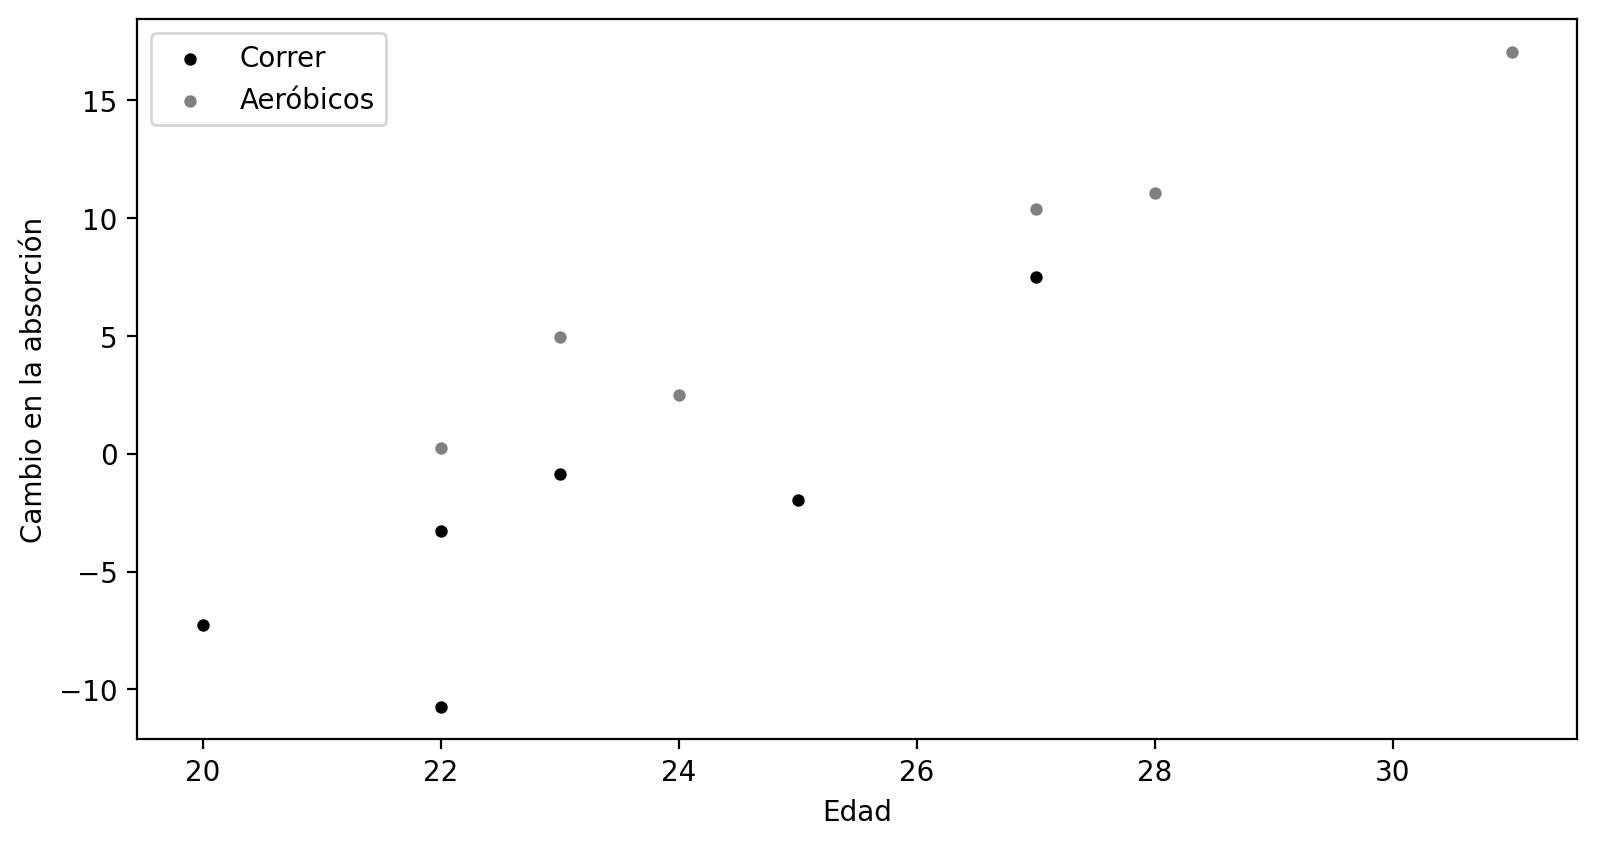

In [3]:
# scatterplot
f = plt.figure(figsize = (8,4), dpi = 200)
ax = f.add_axes([0.1,0.1,0.9,0.9])
#
ax.scatter(edad[X.x1==0],y[X.x1==0],s = 12,c = 'black', label = 'Correr')
ax.scatter(edad[X.x1==1],y[X.x1==1],s = 12,c = 'gray', label = 'Aeróbicos')
#
ax.set_xlabel('Edad')
ax.set_ylabel('Cambio en la absorción')
ax.legend(loc = 0)
plt.show()

In [4]:
# OLS
Xm       = np.array(X)
beta_ols = np.dot(np.dot(np.linalg.inv(np.dot(Xm.T,Xm)),Xm.T),y)
beta_ols

array([[-51.29394595],
       [ 13.10709042],
       [  2.0947027 ],
       [ -0.31824378]])

In [5]:
sig2_ols = np.sum((y - np.dot(Xm,beta_ols))**2)/(n-p)
sig2_ols

8.542476714646659

In [6]:
# from sklearn.linear_model import LinearRegression
# fit_ols = LinearRegression(fit_intercept = False).fit(X,y)
# fit_ols.coef_
# fit_ols.score(X,y)

In [7]:
# hiperparametros (previa g)
nu0 = 1
s20 = sig2_ols
g   = n
# calculos para la posterior
Hg    = (g/(g+1))*np.dot(Xm,np.dot(np.linalg.inv(np.dot(Xm.T,Xm)),Xm.T))
SSRg  = np.dot(y.T,np.dot(np.eye(n) - Hg,y))
Vbeta = (g/(g+1))*np.linalg.inv(np.dot(Xm.T,Xm))
Ebeta = np.dot(Vbeta,np.dot(Xm.T,y))
# Monte Carlo
S = 5000
s2_post   = np.empty((S,1))
beta_post = np.empty((S,p))
np.random.seed(1)
for s in range(S):
    s2_post[s]   = st.invgamma.rvs((nu0+n)/2, scale = (nu0*s20 + SSRg)/2,size = 1)
    beta_post[s] = st.multivariate_normal.rvs(mean = Ebeta.reshape((4,)),cov = s2_post[s]*Vbeta, size = 1)

In [8]:
# inferencia sigma^2
np.quantile(s2_post,q = [0.025,0.5,0.975])

array([ 5.32841435, 10.77943636, 26.0217492 ])

In [9]:
# inferencia sigma
np.quantile(np.sqrt(s2_post),q = [0.025,0.5,0.975])

array([2.30833584, 3.28320519, 5.10115166])

In [10]:
# inferencia beta
r = [np.quantile(beta_post[:,k],q = [0.025,0.5,0.975]) for k in range(p)]
pd.DataFrame(np.array(r).T, index = ['2.5%','50%','97.5%'],
            columns = ['beta'+str(k) for k in range(p)])

beta0      beta1     beta2     beta3
2.5%  -75.621788 -24.704047  0.725428 -1.814847
50%   -47.407955  12.301125  1.932555 -0.302571
97.5% -19.689615  48.421781  3.147912  1.219445

In [11]:
np.mean(beta_post,axis = 0)

array([-47.36735969,  12.29430821,   1.93415119,  -0.300027  ])

In [12]:
np.std(beta_post,ddof = 1, axis = 0)

array([14.18490829, 18.55141409,  0.60954434,  0.76457691])

In [13]:
np.mean(beta_post > 0,axis = 0)

array([0.0022, 0.7642, 0.9962, 0.3342])

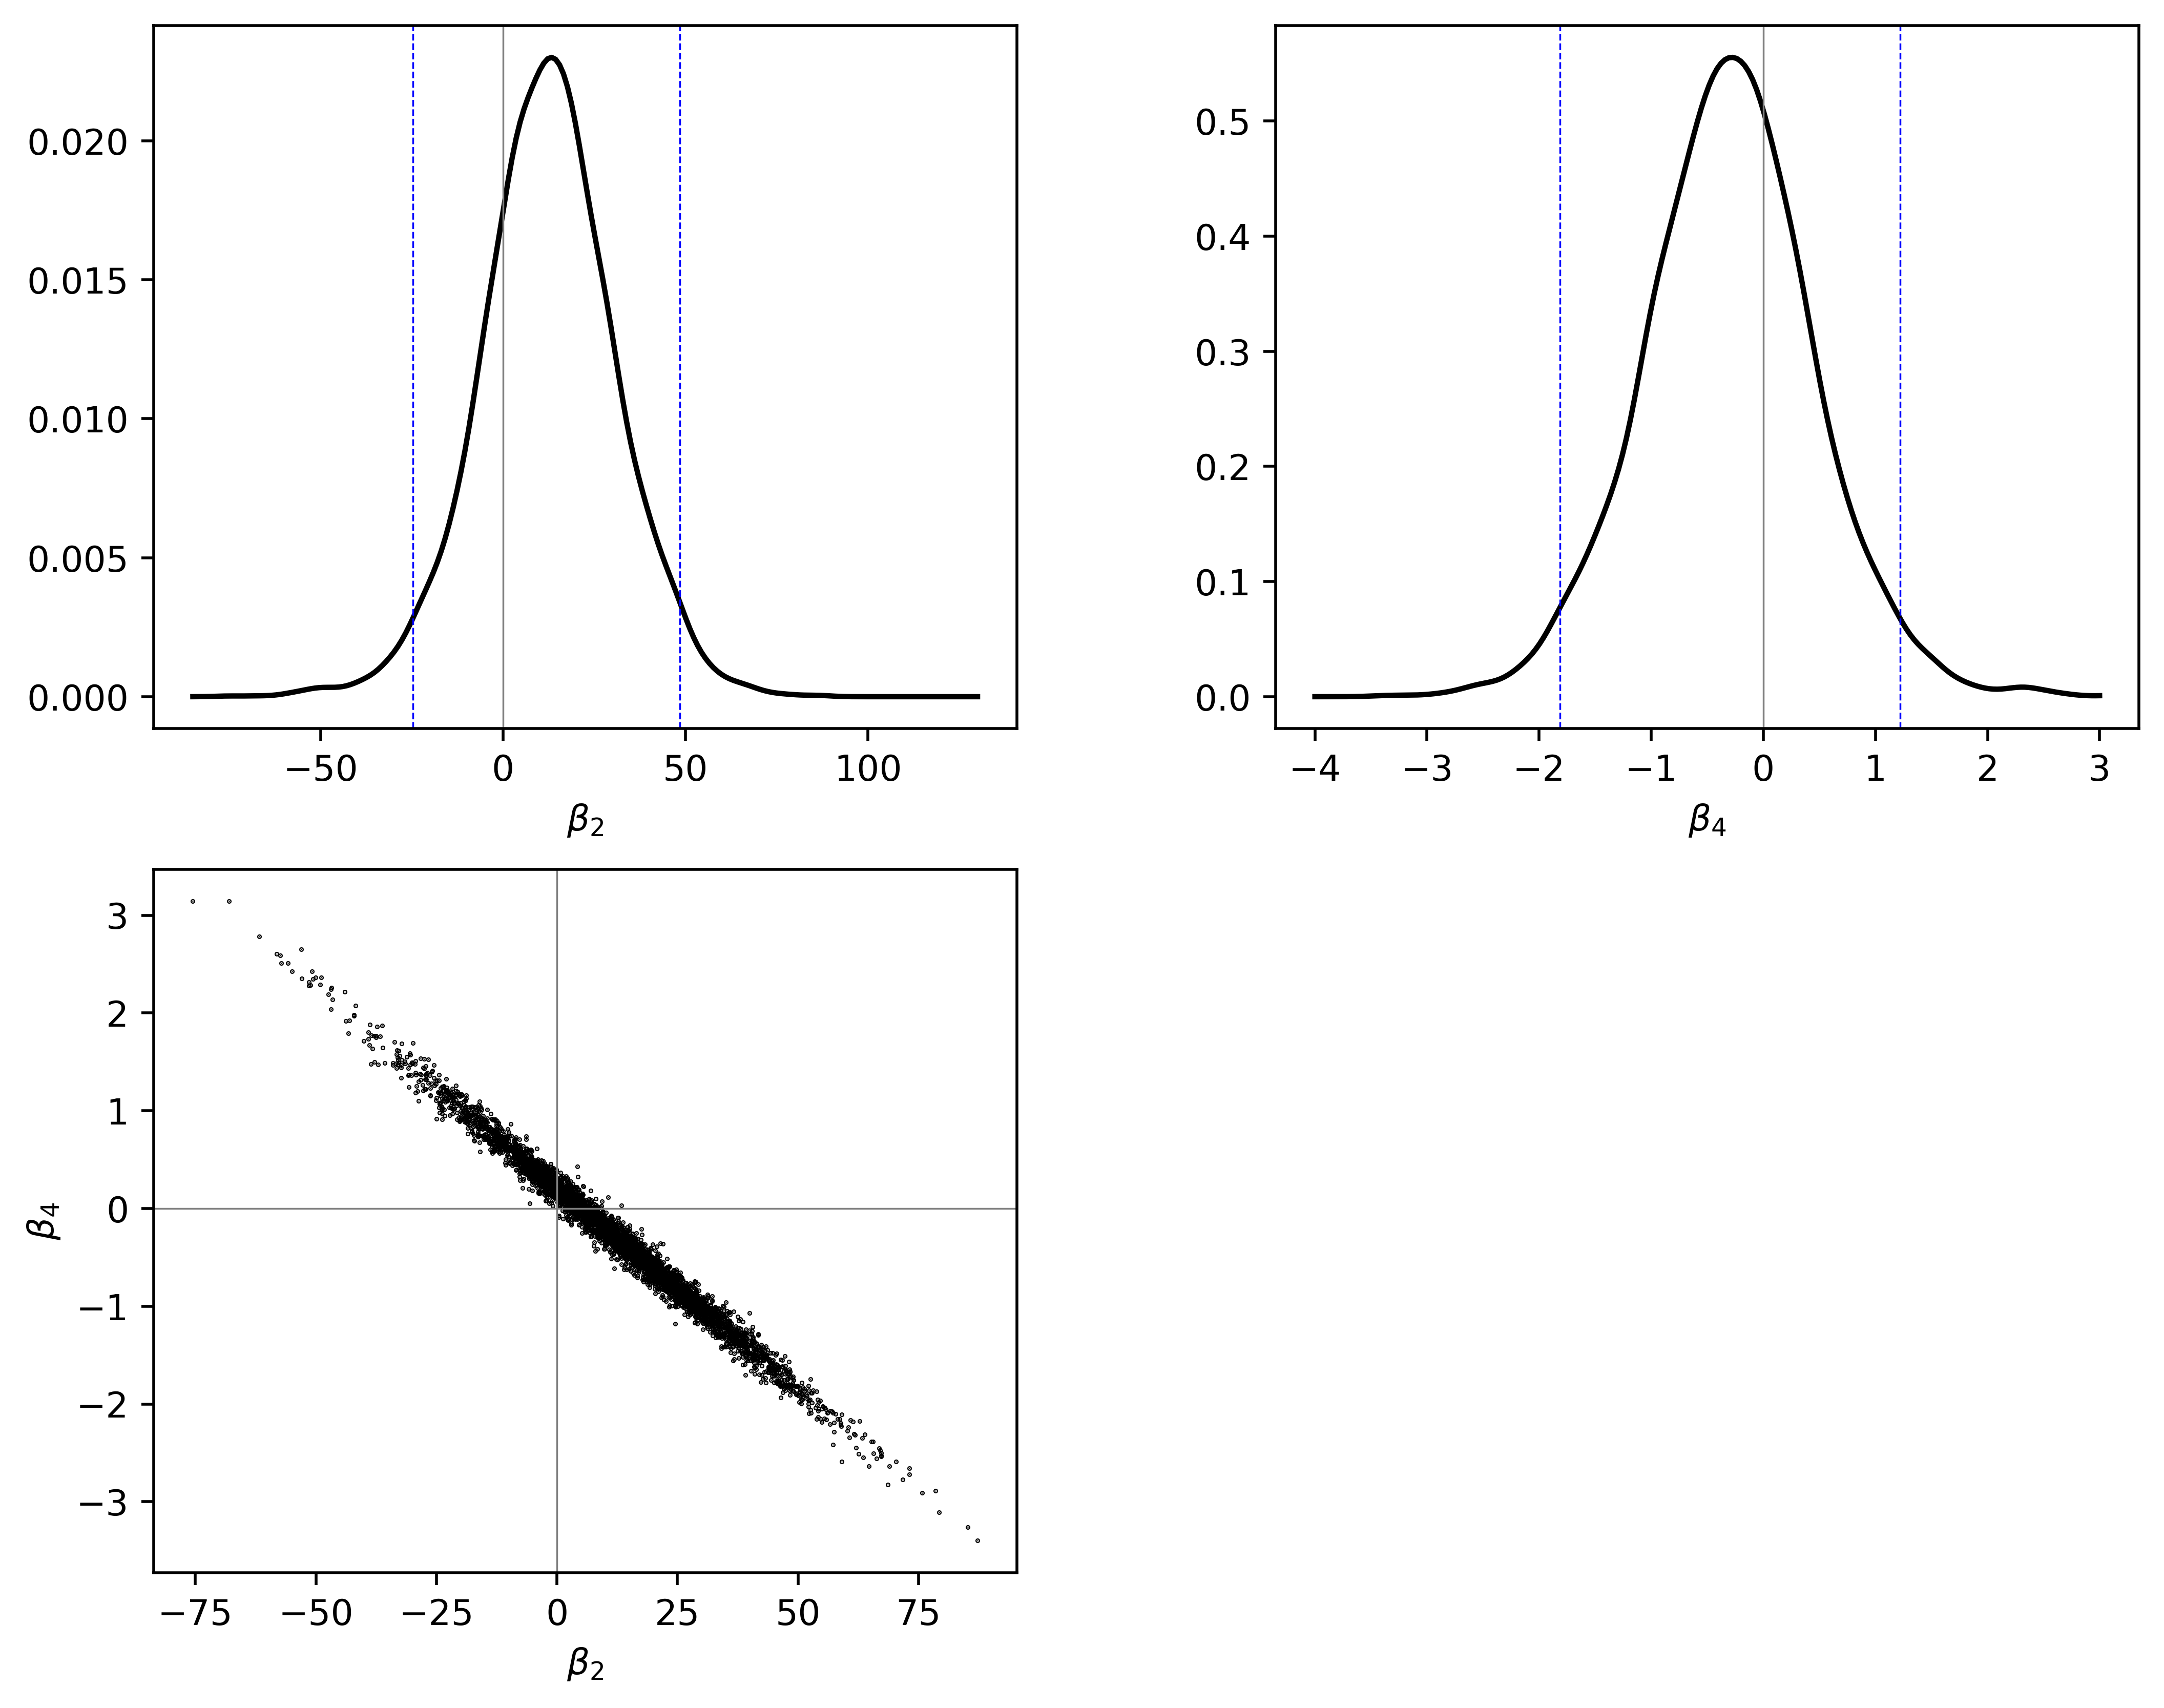

In [14]:
f, ax = plt.subplots(2, 2, figsize = (10,8),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
# beta2 posterior
x = np.linspace(-85,130,num = 200)
ax[0,0].plot(x,st.gaussian_kde(beta_post[:,1])(x),color = 'black')
ax[0,0].axvline(0,linewidth = 0.5, color = 'gray')
ax[0,0].axvline(np.quantile(beta_post[:,1],q = 0.025),linewidth = 0.5, color = 'blue',ls = '--')
ax[0,0].axvline(np.quantile(beta_post[:,1],q = 0.975),linewidth = 0.5, color = 'blue',ls = '--')
ax[0,0].set_xlabel(r"$\beta_2$")
# beta4 posterior
x = np.linspace(-4,3,num = 200)
ax[0,1].plot(x,st.gaussian_kde(beta_post[:,3])(x),color = 'black')
ax[0,1].axvline(0,linewidth = 0.5, color = 'gray')
ax[0,1].axvline(np.quantile(beta_post[:,3],q = 0.025),linewidth = 0.5, color = 'blue',ls = '--')
ax[0,1].axvline(np.quantile(beta_post[:,3],q = 0.975),linewidth = 0.5, color = 'blue',ls = '--')
ax[0,1].set_xlabel(r"$\beta_4$")
# (beta2,beta4) posterior
ax[1,0].scatter(beta_post[:,1],beta_post[:,3],s = 0.1, c = 'black')
ax[1,0].axvline(0,linewidth = 0.5, color = 'gray')
ax[1,0].axhline(0,linewidth = 0.5, color = 'gray')
ax[1,0].set_xlabel(r"$\beta_2$")
ax[1,0].set_ylabel(r"$\beta_4$")
# empty
ax[1,1].axis('off')
#
plt.show()

Las distribuciones posteriores de $\beta_2$ y $\beta_4$ indican una evidencia débil de una diferencia entre los dos grupos, ya que los intervalos de credibilidad al 95% correspondientes contienen cero. Sin embargo, el análisis de estos parámetros por sí solos no es suficiente.

Efecto del tratamiento aeróbico $\delta$:

$$
\begin{align*}
\delta &= \textsf{E}(y \mid \text{edad}, \text{aerobico}) - \textsf{E}(y \mid \text{edad}, \text{aerobico}) \\
      &= ( (\beta_1 + \beta_2) + (\beta_3 + \beta_4)*\text{edad} ) - ( \beta_1 + \beta_3*\text{edad} ) \\
      &= \beta_2 + \beta_4*\text{edad}
\end{align*}
$$


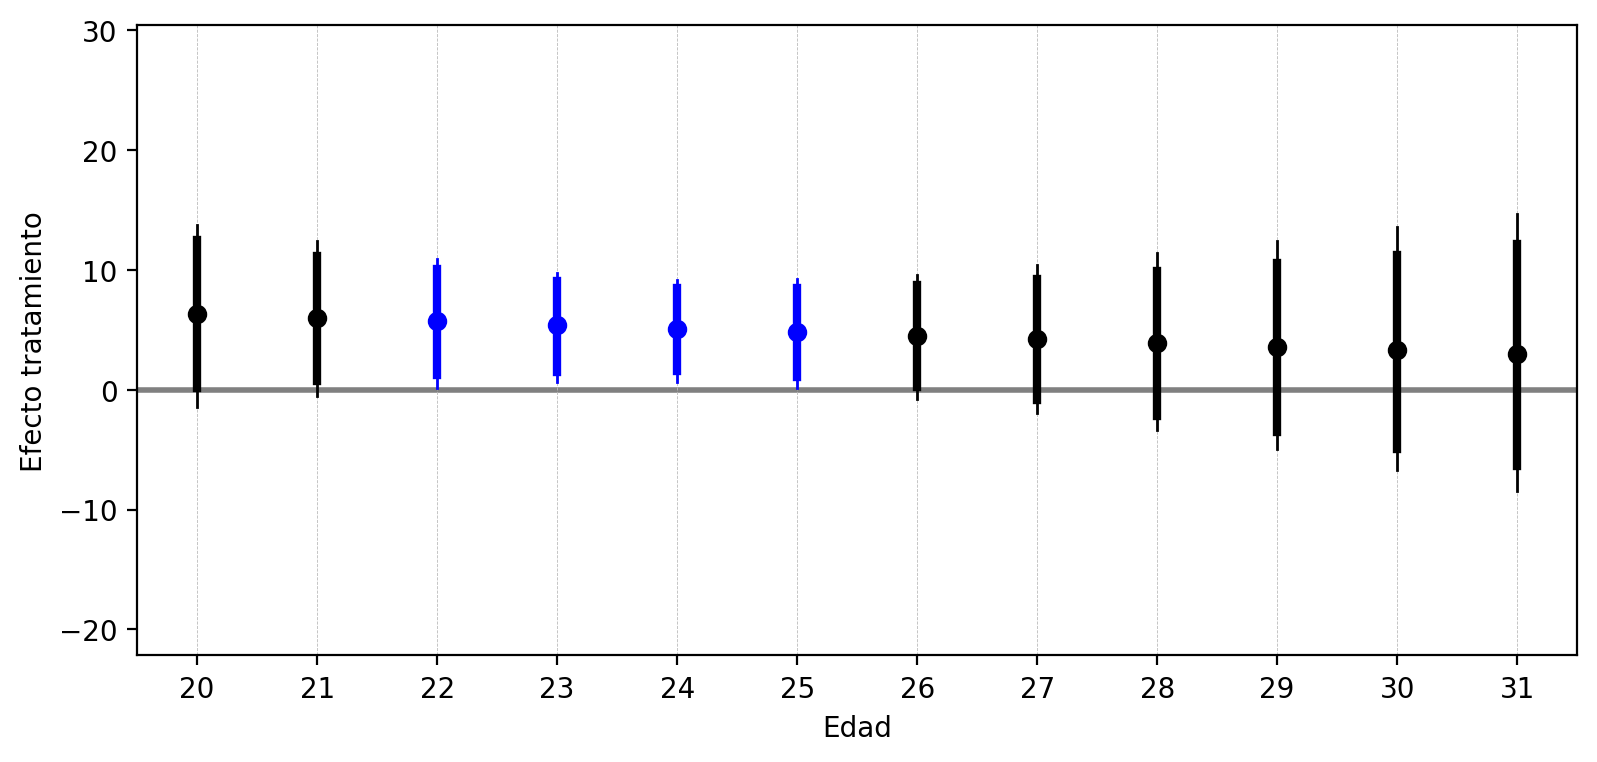

In [15]:
r_edad = np.array(range(np.min(edad),np.max(edad)+1))
n_edad = len(r_edad)
TE     = np.empty((S,n_edad))
for j in range(n_edad):
    TE[:,j] = beta_post[:,1] + beta_post[:,3]*r_edad[j]

that   = np.mean(TE,axis = 0)
ic1    = np.quantile(TE,q = [0.05,0.95],axis = 0)
ic2    = np.quantile(TE,q = [0.025,0.975],axis = 0)
colo   = np.array(['blue','black'])[((ic2[0,:]<0) & (0<ic2[1,:]))+0]
    
f = plt.figure(figsize = (8,3.5), dpi = 200)
ax = f.add_axes([0.1,0.1,0.9,0.9])

def minmax(x):
    return (min(x),max(x))

ax.axhline(0,color = 'gray',linewidth = 2)
for j in range(n_edad):
    ax.axvline(r_edad[j],ls = '--', color = '#bbbbbb',linewidth = 0.3)
    ax.plot(r_edad[[j,j]],ic1[:,j],linewidth = 3, color = colo[j])
    ax.plot(r_edad[[j,j]],ic2[:,j],linewidth = 1, color = colo[j])
    ax.scatter(r_edad[j],that[j], color = colo[j])

ax.set_xlim((np.min(edad)-1/2,np.max(edad)+1/2))
ax.set_ylim((np.min(TE)-1,np.max(TE)+1))
ax.set_xlabel("Edad")
ax.set_ylabel("Efecto tratamiento")
ax.set_xticks(ticks = r_edad,labels = r_edad)

plt.show()


Hay evidencia razonablemente fuerte de una diferencia en las edades jóvenes, y menos evidencia en las más viejas.


## 6 Ejemplo: Jags

Descargar Jags:
 * http://www.sourceforge.net/projects/mcmc-jags/files
 
Manuales:
 * https://people.stat.sc.edu/hansont/stat740/jags_user_manual.pdf
 * http://www.jkarreth.net/files/bayes-cph_Tutorial-JAGS.pdf

In [16]:
# settings
# import pyjags as pj
# data
trat = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
edad = np.array([23,22,22,25,27,20,31,23,27,28,22,24])
y    = np.array([-0.87,-10.74,-3.27,-1.97,7.50,-7.25,17.05,4.96,10.40,11.05,0.26,2.51])
# data
y    = y.reshape((len(y),1))
X    = np.vstack((np.ones(len(y)),trat,edad,trat*edad)).T
# dimensiones
n    = X.shape[0]
p    = X.shape[1]
X    = pd.DataFrame(X,columns = ['x'+str(i) for i in range(p)])

In [17]:
# la Normal está parametrizada en términos de la precisión
# los vectores deben tener el mismo formato
# notación:
#     phi    = 1/sigma^2
#     Omega0 = X^T*X
#     a0     = nu0/2
#     b0     = nu0*sigma0^2/2
code = '''
    model {
        for (i in 1:n) {
            y[i] ~ dnorm(inprod(X[i,], beta), phi)
        }
        beta[1:p] ~ dmnorm(beta0[1:p], (phi/g)*Omega0[1:p,1:p])
        phi ~ dgamma(a0, b0)
        log_like = sum(logdensity.norm(y,X%*%beta,phi))
    }
'''
# previa
beta0  = np.zeros(p)
Omega0 = np.dot(Xm.T,Xm)
g      = n
nu0    = 1
s20    = sig2_ols
a0     = nu0/2
b0     = nu0*s20/2
# input
model_data = dict({
    'y'      : y.reshape((n,)),
    'X'      : X,
    'n'      : n,
    'p'      : p,
    'g'      : g,
    'beta0'  : beta0,
    'Omega0' : Omega0,
    'a0'     : a0,
    'b0'     : b0
})
# parameters
model_parameters = ['beta', 'phi','log_like']
# initial values
initial_values = [
    dict({
        'beta' : beta0,
        'phi'  : 1/s20
    }),
    dict({
        'beta' : beta0,
        'phi'  : 1/s20
    }),
    dict({
        'beta' : beta0,
        'phi'  : 1/s20
    })
]
# mcmc settings
niter  = 6000
nburn  = 1000
nthin  = 1
nchain = len(initial_values)
# mcmc
np.random.seed(1)
model = pj.Model(code, data = model_data, chains = nchain,init = initial_values)
fit   = model.sample(iterations = nburn + niter, vars = model_parameters,thin = nthin)

adapting: iterations 3000 of 3000, elapsed 0:00:00, remaining 0:00:00
sampling: iterations 21000 of 21000, elapsed 0:00:01, remaining 0:00:00


In [18]:
# convertir a objeto del paquete arviz (av)
fit_mcmc = av.from_pyjags(
    posterior=fit, 
    # prior=jags_prior_samples, 
    log_likelihood={'y': 'log_like'}, 
    save_warmup=True, 
    warmup_iterations=nburn
)
fit_mcmc

Inference data with groups:
	> posterior
	> log_likelihood

Warmup iterations saved (warmup_*).

In [19]:
av.summary(fit_mcmc,hdi_prob = 0.95)

mean      sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
beta[0] -47.420  13.933   -74.692    -19.315      0.107    0.076   16954.0   
beta[1]  12.283  17.799   -22.867     47.702      0.138    0.102   16704.0   
beta[2]   1.938   0.598     0.704      3.081      0.005    0.003   16920.0   
beta[3]  -0.302   0.732    -1.778      1.124      0.006    0.004   16724.0   
phi       0.099   0.039     0.033      0.177      0.000    0.000    6938.0   

         ess_tail  r_hat  
beta[0]   15694.0    1.0  
beta[1]   14976.0    1.0  
beta[2]   15757.0    1.0  
beta[3]   15549.0    1.0  
phi        7294.0    1.0

In [20]:
# numero de muestras
S = nchain
# WAIC
av.waic(fit_mcmc,scale = 'deviance')

/home/samuel/.local/lib/python3.9/site-packages/arviz/stats/stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/home/samuel/.local/lib/python3.9/site-packages/arviz/stats/stats.py:1677: UserWarning: The point-wise WAIC is the same with the sum WAIC, please double check
            the Observed RV in your model to make sure it returns element-wise logp.
            
  warnings.warn(


Computed from 18000 posterior samples and 1.0 observations log-likelihood matrix.

              Estimate       SE
deviance_waic    66.45     0.00
p_waic            3.47        -

There has been a warning during the calculation. Please check the results.

In [21]:
# diagnostico
av.ess(fit_mcmc,relative = True)

<xarray.Dataset>
Dimensions:     (beta_dim_0: 4)
Coordinates:
  * beta_dim_0  (beta_dim_0) int64 0 1 2 3
Data variables:
    beta        (beta_dim_0) float64 0.9419 0.928 0.94 0.9291
    phi         float64 0.3854

Note que el tamaño efectivo de muestra para $\boldsymbol{\beta}$ es cercano al número de iteraciones del algoritmo. Sin embargo, para $\phi$ el tamaño de muestra a penas es el 37% de la cantidad de iteraciones. El tamaño efectivo de muestra para la log-verosimilitud es el siguiente:

In [22]:
[av.ess(fit['log_like'][0,:nburn,i]) for i in range(3)]

[710.7687526617543, 414.4148522062924, 552.389530239301]

array([[<AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n0'}>],
       [<AxesSubplot:title={'center':'beta\n1'}>,
        <AxesSubplot:title={'center':'beta\n1'}>],
       [<AxesSubplot:title={'center':'beta\n2'}>,
        <AxesSubplot:title={'center':'beta\n2'}>],
       [<AxesSubplot:title={'center':'beta\n3'}>,
        <AxesSubplot:title={'center':'beta\n3'}>],
       [<AxesSubplot:title={'center':'phi'}>,
        <AxesSubplot:title={'center':'phi'}>]], dtype=object)

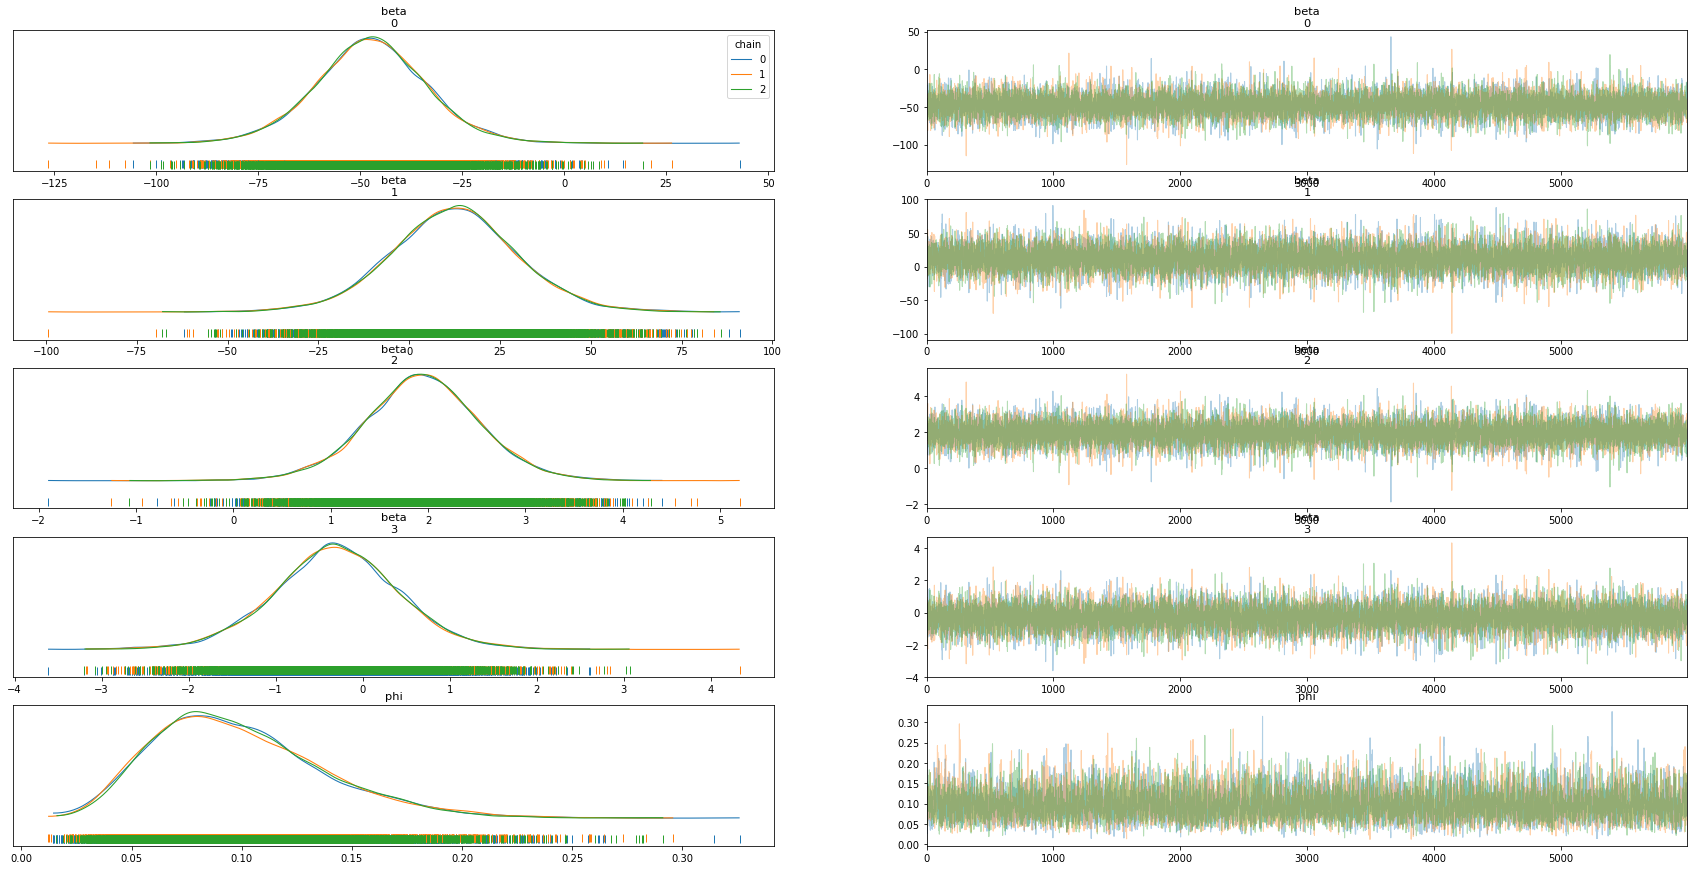

In [23]:
# algunos graficos
av.plot_trace(fit_mcmc,compact = False,legend = True,figsize = (30,15),rug = True)

array([[<AxesSubplot:title={'center':'beta\n0, 0'}>,
        <AxesSubplot:title={'center':'beta\n0, 1'}>,
        <AxesSubplot:title={'center':'beta\n0, 2'}>],
       [<AxesSubplot:title={'center':'beta\n0, 3'}>,
        <AxesSubplot:title={'center':'beta\n1, 0'}>,
        <AxesSubplot:title={'center':'beta\n1, 1'}>],
       [<AxesSubplot:title={'center':'beta\n1, 2'}>,
        <AxesSubplot:title={'center':'beta\n1, 3'}>,
        <AxesSubplot:title={'center':'beta\n2, 0'}>],
       [<AxesSubplot:title={'center':'beta\n2, 1'}>,
        <AxesSubplot:title={'center':'beta\n2, 2'}>,
        <AxesSubplot:title={'center':'beta\n2, 3'}>],
       [<AxesSubplot:title={'center':'phi\n0'}>,
        <AxesSubplot:title={'center':'phi\n1'}>,
        <AxesSubplot:title={'center':'phi\n2'}>]], dtype=object)

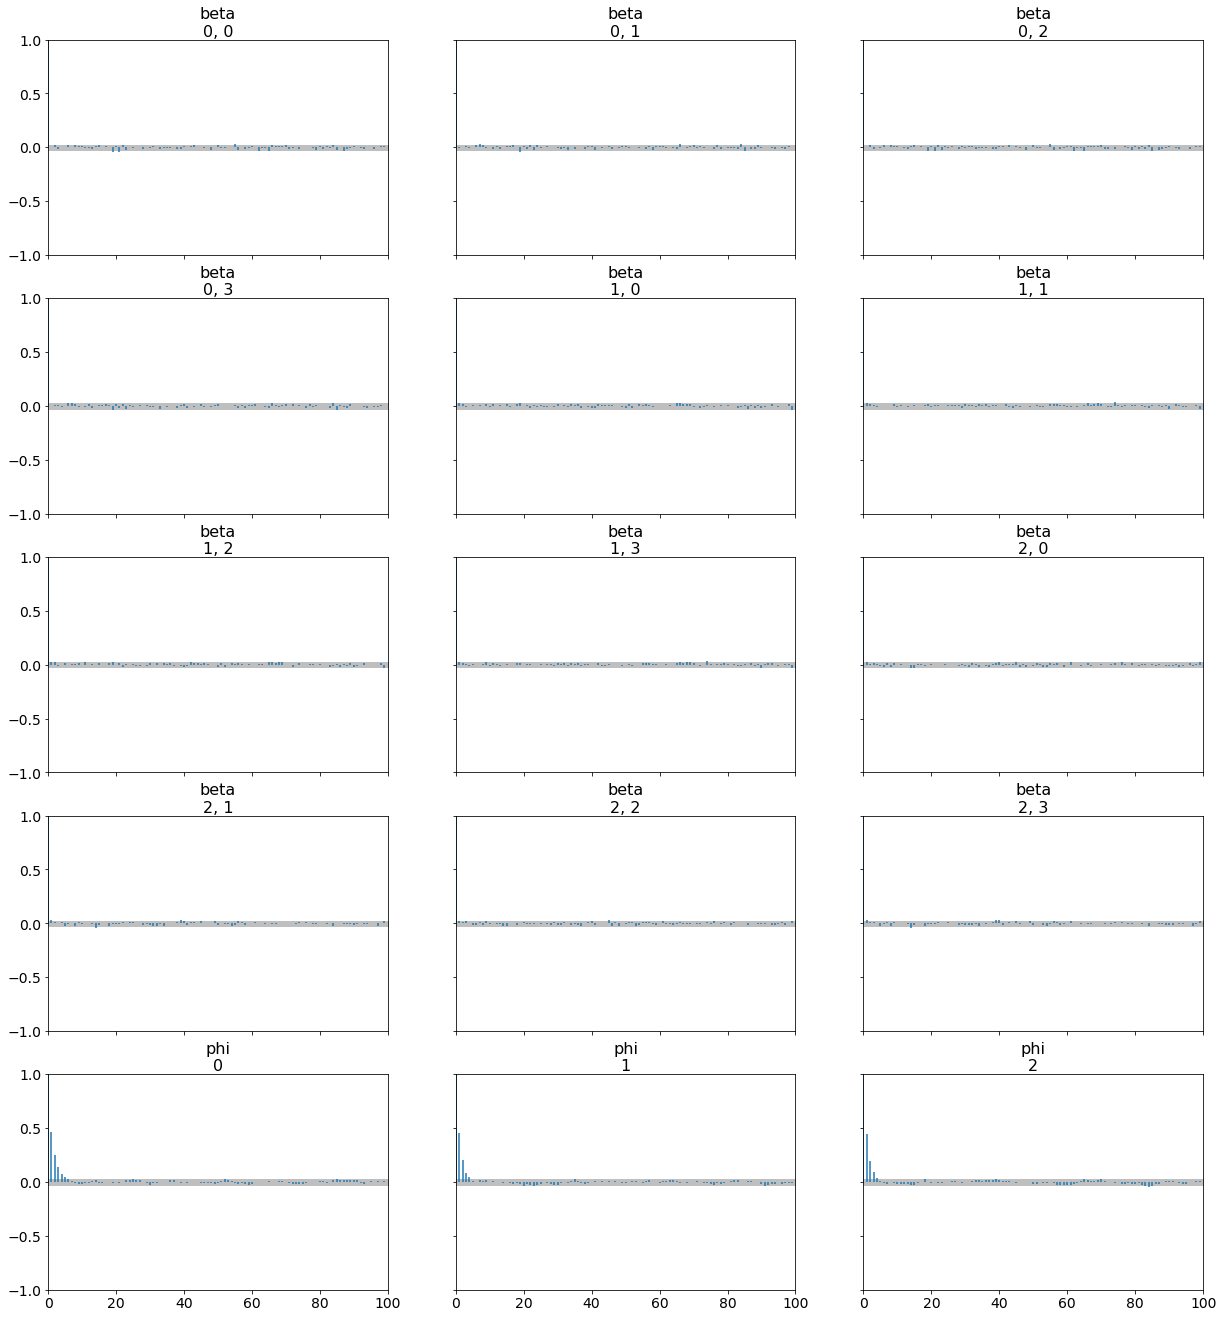

In [24]:
av.plot_autocorr(fit_mcmc)

array([[<AxesSubplot:ylabel='beta\n1'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta\n2'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:ylabel='beta\n3'>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:xlabel='beta\n0', ylabel='phi'>,
        <AxesSubplot:xlabel='beta\n1'>, <AxesSubplot:xlabel='beta\n2'>,
        <AxesSubplot:xlabel='beta\n3'>]], dtype=object)

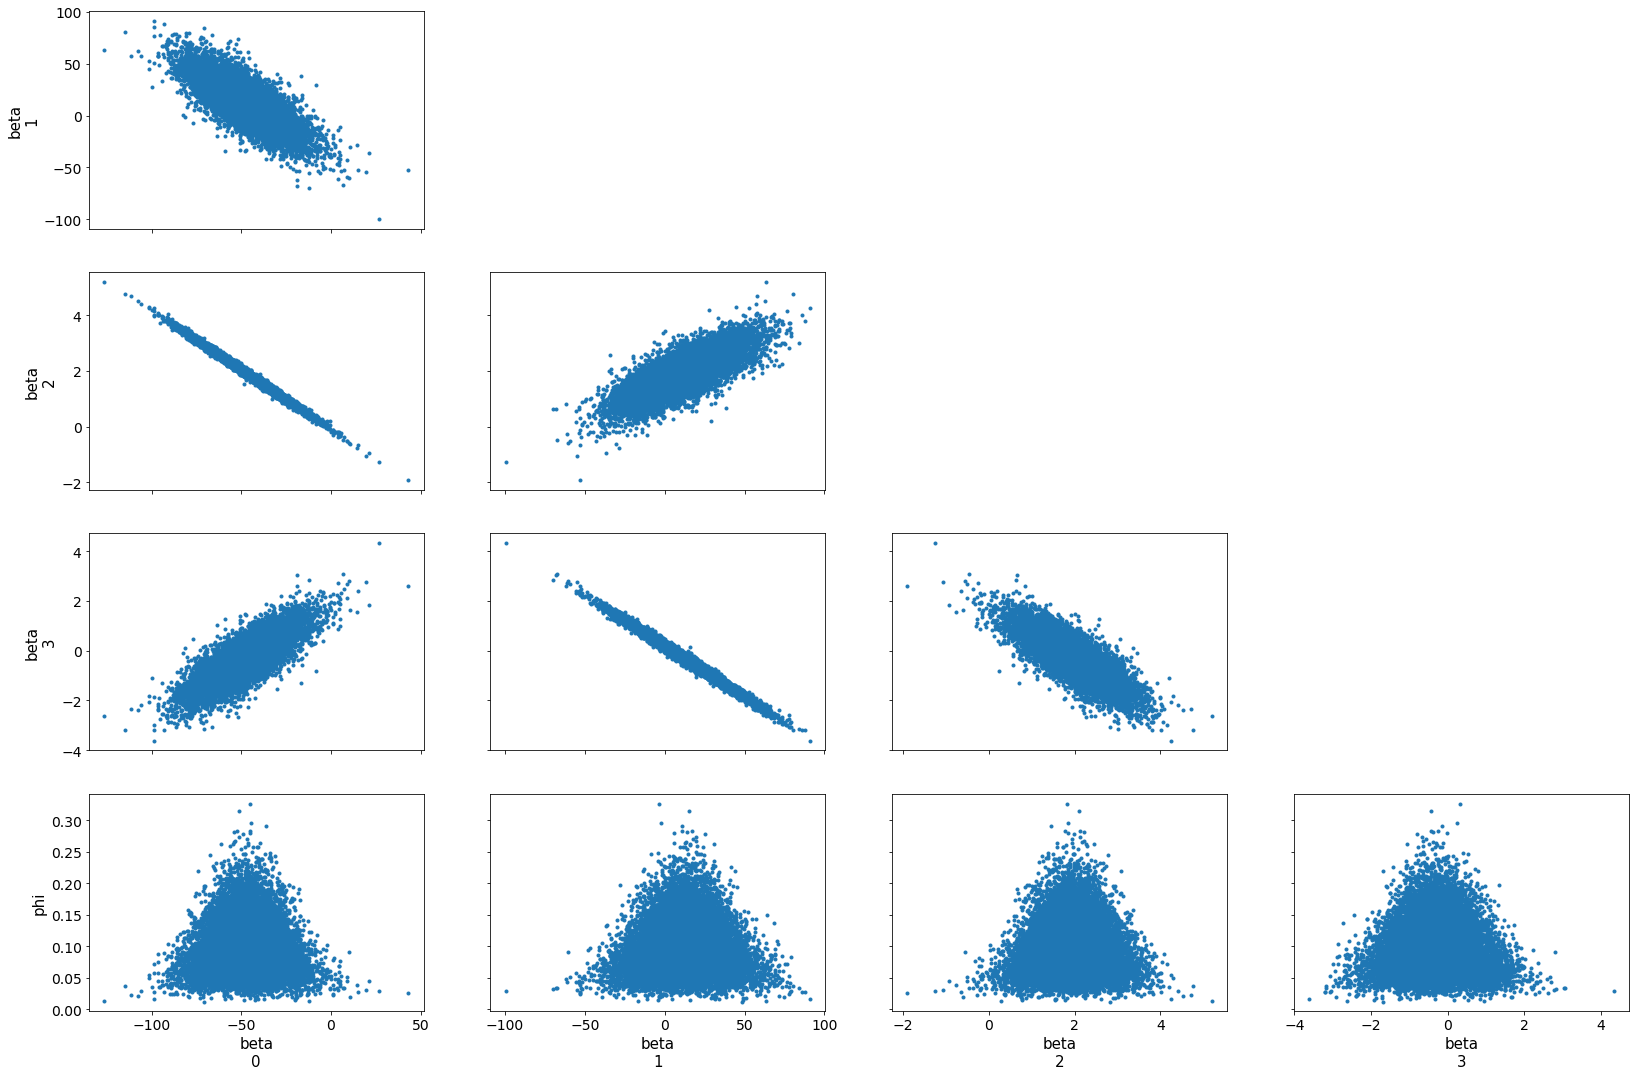

In [25]:
av.plot_pair(fit_mcmc)

array([[<AxesSubplot:title={'center':'beta\n0'}>,
        <AxesSubplot:title={'center':'beta\n1'}>,
        <AxesSubplot:title={'center':'beta\n2'}>],
       [<AxesSubplot:title={'center':'beta\n3'}>,
        <AxesSubplot:title={'center':'phi'}>, <AxesSubplot:>]],
      dtype=object)

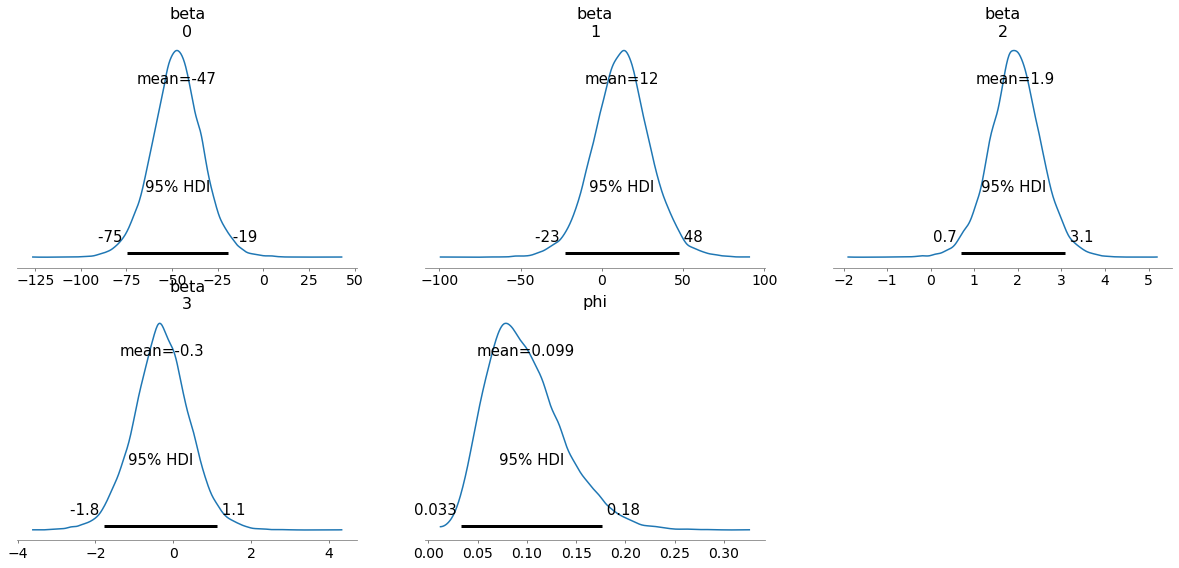

In [26]:
av.plot_posterior(fit_mcmc,hdi_prob = 0.95)

In [27]:
# vea más gráficos en: https://arviz-devs.github.io/arviz/api/generated/arviz.plot_trace.html

## 7 Ejemplo: Temperatura de la superficie del mar

Se considera la **media de las observaciones** registradas por medio de varios **dispositivos** acerca de la **temperatura de la superficie del mar** (SST, por sus siglas en inglés) en $^\text{o}$C, junto con el **tipo de dispositivo** (cuatro categorías: **bucket**, **eri**, **d.buoy**, **f.buoy**) con sus respectivas **ubicaciones** (latitud y longitud) en el **mar Mediterráneo en diciembre de 2003**. 

![](bucket.jpg)

El **objetivo** consiste en ajustar un **modelo probabilístico** para:

- Investigar el **proceso generativo** de las observaciones.
- Evaluar la asociación entre las **covariables** y las observaciones.
- Caracterizar las **propiedades estructurales** de las observaciones.
- Imputar **observaciones faltantes**.
- Predecir **observaciones futuras**.
- Cuantificar la **incertidumbre**.


### 7.1 Datos

La base de datos `sst.dat` contiene $m = 86$ registros de la forma
$$
\left[\,\text{id}_j,\text{latitud}_j,\text{longitud}_j,\bar{y}_j,n_j,\text{tipo}_j\,\right]
$$
donde $\bar{y}_j=\frac{1}{n_j}\sum_{i=1}^{n_j} y_{i,j}$ es el promedio de las $n_j$ temperaturas registradas por el dispositivo $j$, para $j=1,\ldots,m$.


In [28]:
# datos
df = pd.read_csv('sst.dat',sep = '\s+')
df.shape

(86, 6)

In [29]:
df.head(6)

id   lat   lon  temp   n    type
0   1  33.8  33.1  21.3   1  bucket
1   2  34.5  25.8  19.1   2  d.buoy
2   3  33.9  29.3  19.9   1  bucket
3   4  33.3  32.9  20.6   2  d.buoy
4   5  34.3  33.4  20.0  23  f.buoy
5   6  34.1  32.2  20.5  62  f.buoy

In [30]:
# datos por dispositivo
df1 = df[df.type == 'bucket'] # 1 = bucket
df2 = df[df.type == 'eri']    # 2 = bucket
df3 = df[df.type == 'd.buoy'] # 3 = bucket
df4 = df[df.type == 'f.buoy'] # 4 = bucket
df = pd.concat([df1,df2,df3,df4],ignore_index = True)

# tamaños
m1 = df1.shape[0]
m2 = df2.shape[0]
m3 = df3.shape[0]
m4 = df4.shape[0]
df['cod'] = np.repeat([1,2,3,4],[m1,m2,m3,m4])
df.type.value_counts(sort = False)

bucket    36
eri       35
d.buoy    10
f.buoy     5
Name: type, dtype: int64

In [31]:
# mapa usando gmplot
# import gmplot
mp = gmplot.GoogleMapPlotter(np.mean(df.lat),np.mean(df.lon),zoom = 7)
mp.scatter(df.lat,df.lon,color = list(np.array(['black','red','green','blue'])[df.cod-1]))
mp.draw('mapa.html')
# Abra el archivo mapa.html para visualizar el gráfico. Lo puede abrir desde la pestaña principal de Jupyter.


Los tipos de dispositivos son $\color{black}{\text{bucket}}$, $\color{red}{\text{eri}}$, $\color{green}{\text{d.buoy}}$, $\color{blue}{\text{d.buoy}}$.


### 7.2 Análisis exploratorio de datos

In [32]:
# n de dispositivos (grupos)
m = df.shape[0]
m

86

In [33]:
# variable respuesta
y = df.temp
y.describe()

count    86.000000
mean     19.555814
std       1.400471
min      15.000000
25%      18.700000
50%      19.650000
75%      20.600000
max      22.000000
Name: temp, dtype: float64

In [34]:
# tamaños de muestra
nj = df.n
nj.value_counts(sort = False)

1     70
2      7
3      4
23     1
62     1
37     1
94     1
24     1
Name: n, dtype: int64

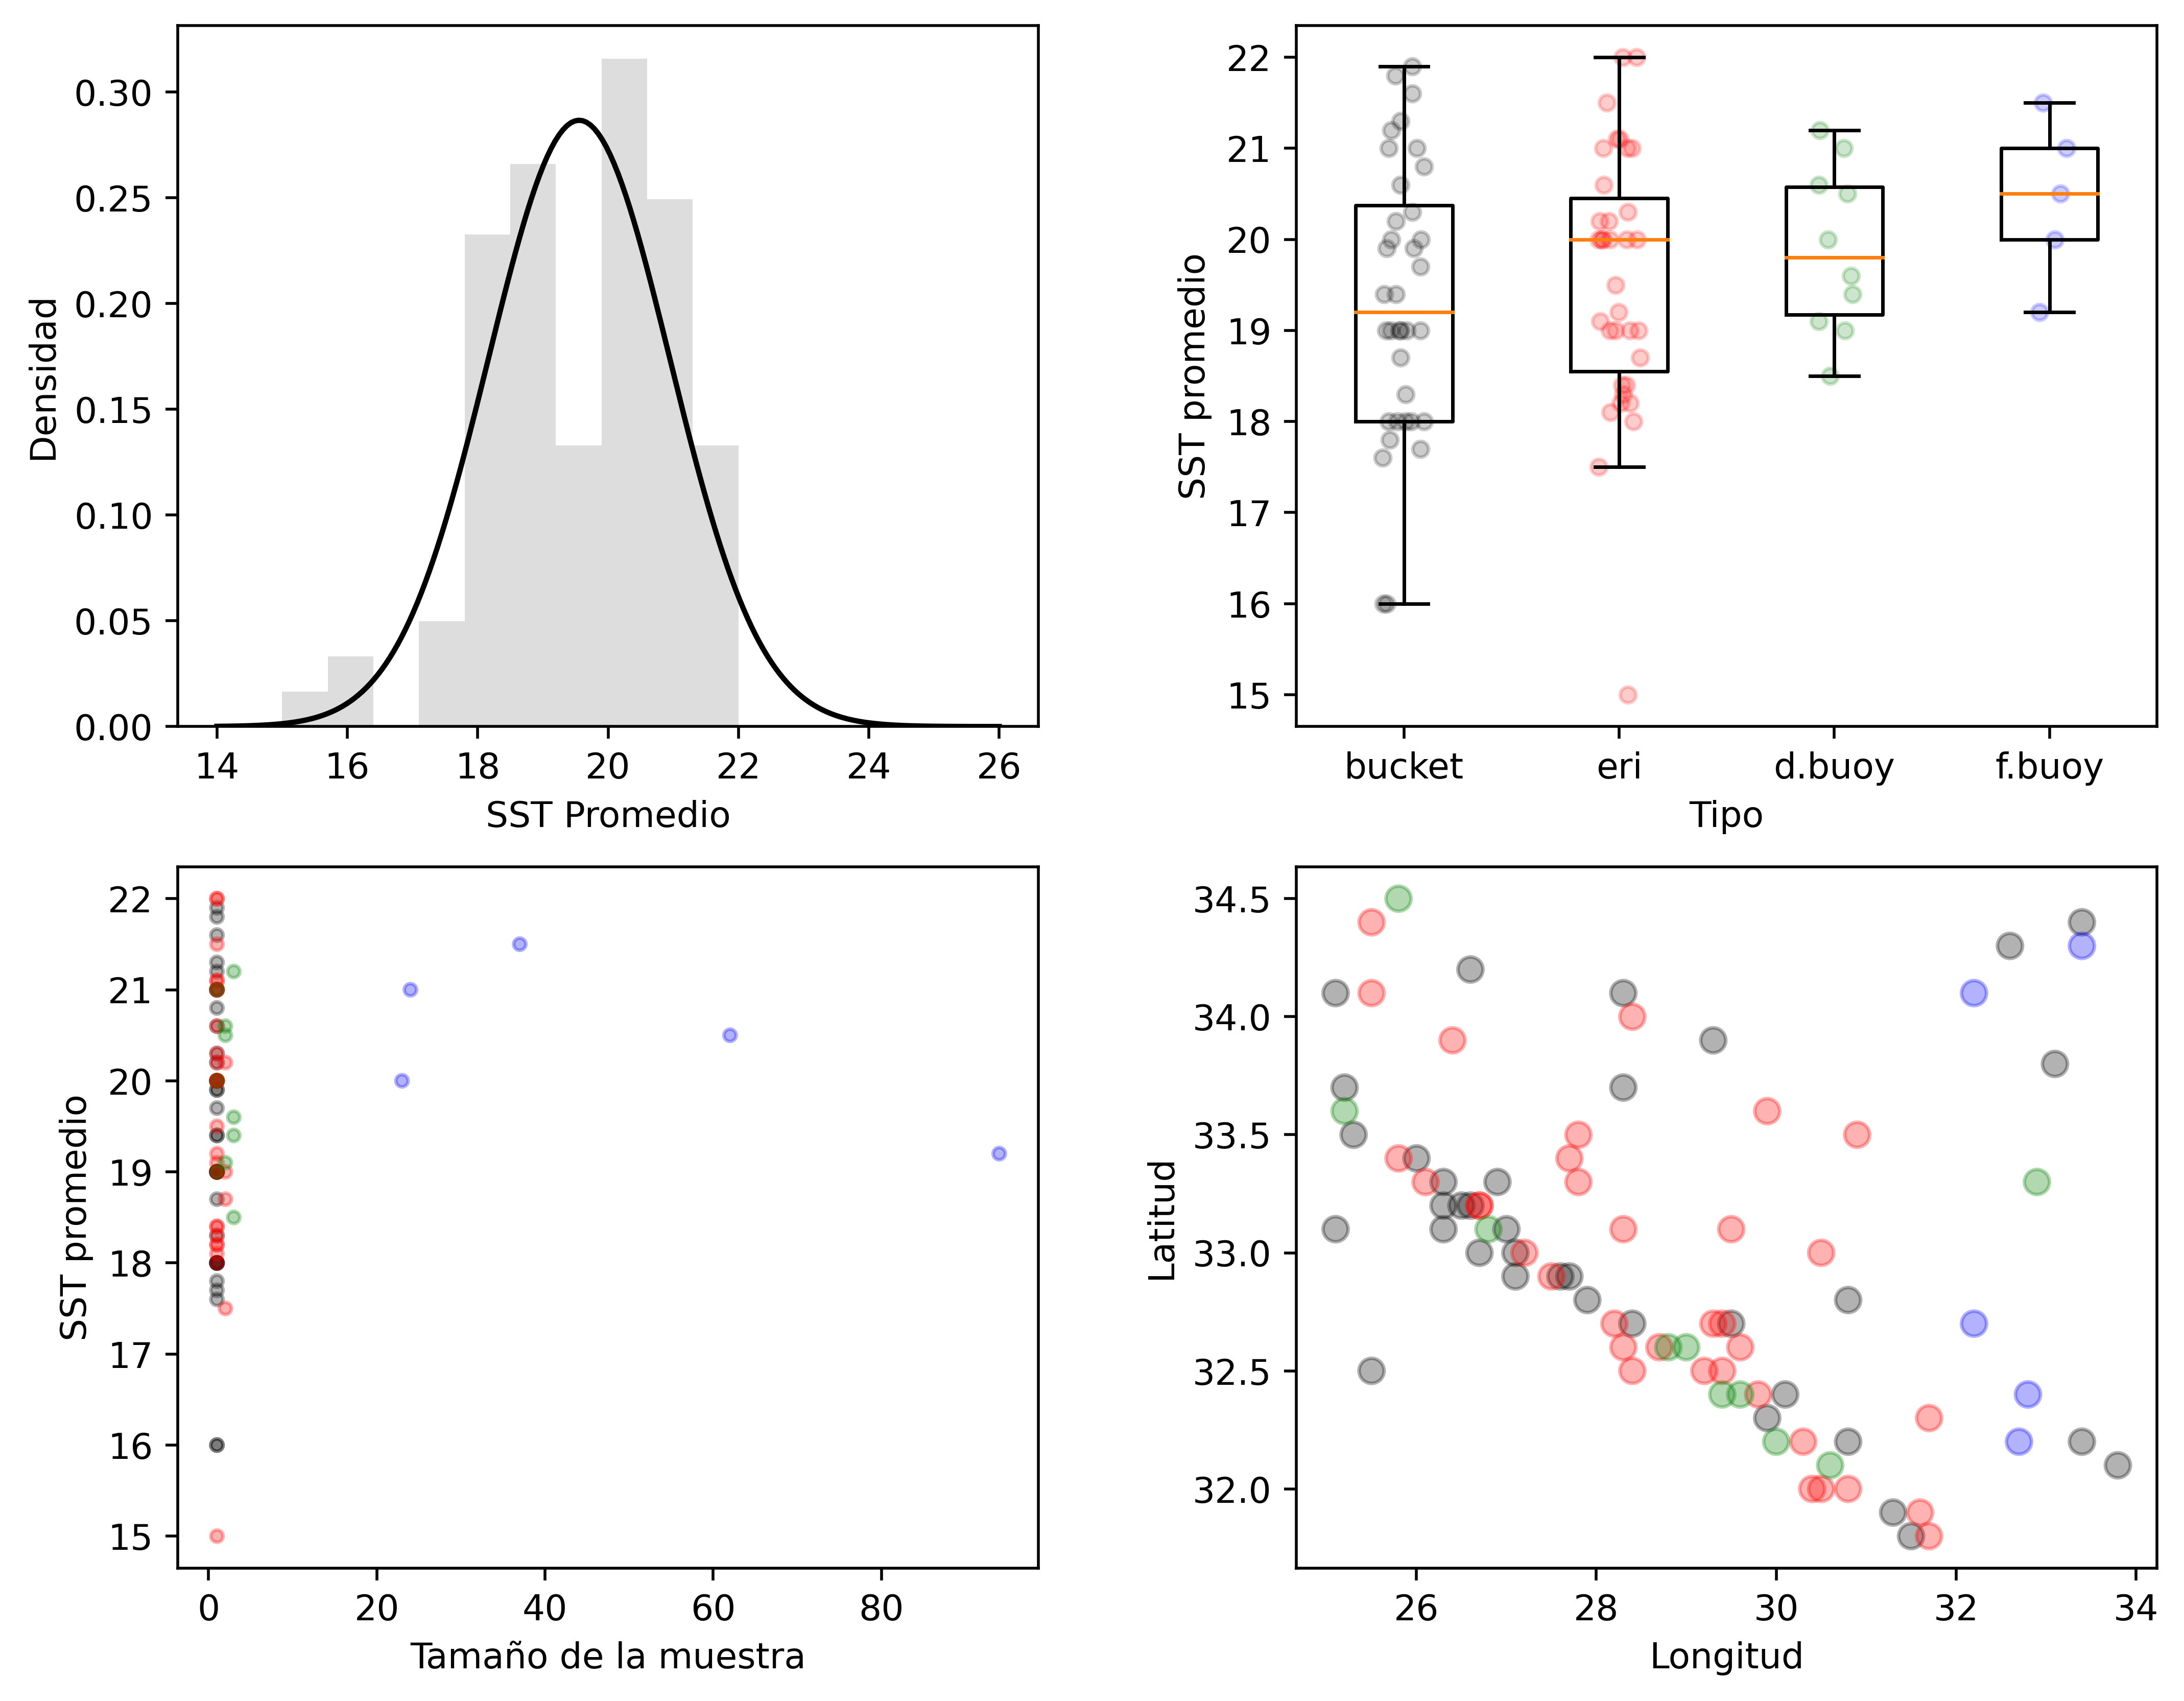

In [35]:
f, ax = plt.subplots(2, 2, figsize = (10,8),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
# histograma
y_grid = np.linspace(14,26,num = 200)
ax[0,0].hist(y,density = True,color = '#dddddd')
ax[0,0].plot(y_grid,st.norm.pdf(y_grid,np.mean(y),np.std(y)),color = 'black')
ax[0,0].set_xlabel('SST Promedio')
ax[0,0].set_ylabel('Densidad')
# cajas
wd = 1/5
ax[0,1].boxplot([df1.temp, df2.temp, df3.temp, df4.temp],showfliers = False)
ax[0,1].scatter(x = 1 - wd/2 + np.random.random(m1)*wd,y = df1.temp,s = 20,alpha = 0.2,c = 'black')
ax[0,1].scatter(x = 2 - wd/2 + np.random.random(m2)*wd,y = df2.temp,s = 20,alpha = 0.2,c = 'red')
ax[0,1].scatter(x = 3 - wd/2 + np.random.random(m3)*wd,y = df3.temp,s = 20,alpha = 0.2,c = 'green')
ax[0,1].scatter(x = 4 - wd/2 + np.random.random(m4)*wd,y = df4.temp,s = 20,alpha = 0.2,c = 'blue')
ax[0,1].set_xlabel('Tipo')
ax[0,1].set_ylabel('SST promedio')
ax[0,1].set_xticks(ticks = [1,2,3,4],labels = ['bucket','eri','d.buoy','f.buoy'])
# dispersograma
ax[1,0].scatter(df.n,df.temp,c = np.array(['black','red','green','blue'])[df.cod-1],alpha = 0.3, s = 12)
ax[1,0].set_xlabel('Tamaño de la muestra')
ax[1,0].set_ylabel('SST promedio')
# locacion
ax[1,1].scatter(df.lon,df.lat,c = np.array(['black','red','green','blue'])[df.cod-1],alpha = 0.3, s = 50)
ax[1,1].set_xlabel('Longitud')
ax[1,1].set_ylabel('Latitud')
#
plt.show()

### 7.3 Modelamiento

Los $m$ registros se asumen como **grupos independientes**, cada uno con $n_j$ observaciones $y_{1,j},\ldots,y_{n_j,j}$ condicionalmente independientes normalmente distribuidas con media $\mu_j$ y varianza $\sigma^2_j$, i.e., $y_{i,j}\mid\mu_j,\sigma^2_j \stackrel{\text{iid}}{\sim} \textsf{N}(\mu_j,\sigma^2_j)$, lo que significa que
$$
\bar{y}_j\mid\mu_j,\sigma^2_j \stackrel{\text{ind}}{\sim} \textsf{N}(\mu_j,\sigma^2_j/n_j)
$$
donde $\bar{y}_j=\frac{1}{n_j}\sum_{i=1}^{n_j} y_{i,j}$, para $j = 1,\ldots,m$.

Para introducir la **asociación** entre la repuesta media de las observaciones $\mu_j$ y las covariables $x_{j,1},\ldots,x_{j,p}$, se considera el predictor lineal $\eta_j=\boldsymbol{x}_j^{\textsf{T}}\boldsymbol{\beta} = \sum_{k=1}^p \beta_k x_{j,k}$ por medio de una dependencia estocástica Normal de la forma
$$
\mu_j\mid\boldsymbol{\beta},\tau^2 \stackrel{\text{iid}}{\sim} \textsf{N}(\boldsymbol{x}_j^{\textsf{T}}\boldsymbol{\beta},\tau^2)
$$
donde $\boldsymbol{x}_j=(x_{j,1},\ldots,x_{j,p})$ y $\boldsymbol{\beta}=(\beta_1,\ldots,\beta_p)$.

Se observa que bajo esta formulación se tiene que
$$
p(\bar{y}_j\mid\boldsymbol{\beta},\sigma^2_j,\tau^2) = \int_{\mathbb{R}} p(\bar{y}_j,\mu_j\mid\boldsymbol{\beta},\sigma^2_j,\tau^2)\,\text{d}\mu_j = \textsf{N}(\bar{y}_j\mid\boldsymbol{x}_j^{\textsf{T}}\boldsymbol{\beta},\sigma^2_j/n_j+\tau^2)\,.
$$

En resumen,
$$
\bar{\boldsymbol{y}}\mid\boldsymbol{\mu},\boldsymbol{\sigma}^2\sim\textsf{N}_m(\boldsymbol{\mu},\textsf{diag}(\sigma^2_1/n_1,\ldots,\sigma^2_m/n_m))
\qquad\text{y}\qquad
\boldsymbol{\mu}\mid\boldsymbol{\beta},\tau^2\sim\textsf{N}_m(\mathbf{X}\boldsymbol{\beta},\tau^2\mathbf{I})
$$
donde $\bar{\boldsymbol{y}}=(\bar{y}_1,\ldots,\bar{y}_m)$, $\boldsymbol{\mu}=(\mu_1,\ldots,\mu_m)$, $\boldsymbol{\sigma}^2=(\sigma^2_1,\ldots,\sigma^2_m)$ y $\mathbf{X}=(\boldsymbol{x}_1^{\textsf{T}},\ldots,\boldsymbol{x}_m^{\textsf{T}})$.

Para la **estructura de regresión** se considera la previa impropia
$$
p(\boldsymbol{\beta},\log\tau^2) \propto 1
\qquad\Longleftrightarrow \qquad
p(\boldsymbol{\beta},\tau^2) \propto \frac{1}{\tau^2}
$$
la cual no requiere la especificación de hiperparámetros.

Los **componentes de intra-varianza** se modelan jerárquicamente mediante 
$$
\sigma^2_j\mid\nu,\upsilon^2 \stackrel{\text{iid}}{\sim} \textsf{GI}(\nu/2,\nu\upsilon^2/2)\,,\qquad
p(\nu)\propto e^{-\lambda_0\nu}
\qquad\text{y}\qquad
\upsilon^2\sim\textsf{G}(\alpha_0/2,\beta_0/2)\,.
$$

Los **parámetros del modelo** son $\boldsymbol{\mu}$, $\boldsymbol{\sigma}^2$, $\boldsymbol{\beta}$, $\tau^2$, $\nu$ y $\upsilon^2$.

Los **hiperparámetros del modelo** son $\lambda_0$, $\alpha_0$ y $\beta_0$. 


<img src="ejemplo regresion 2.jpg" width = 550 />


### 7.4 Ajuste del modelo

#### Distribución posterior 

La **distribución posterior** de $\mathbf{\Theta} = (\boldsymbol{\mu},\boldsymbol{\sigma}^2,\boldsymbol{\beta},\tau^2,\nu,\upsilon^2)$ es

$$
\begin{align*}
p(\mathbf{\Theta}\mid \bar{\boldsymbol{y}}) 
&\propto \prod_{j=1}^m \textsf{N}(\bar{y}_j\mid\mu_j,\sigma^2_j/n_j) \\
&\hspace{1cm}\times \prod_{j=1}^m \textsf{N}(\mu_j\mid\boldsymbol{x}_j^{\textsf{T}}\boldsymbol{\beta},\tau^2) \times \prod_{j=1}^m \textsf{GI}(\sigma^2_j\mid\nu/2,\nu\upsilon^2/2)\\
&\hspace{2cm}\times \frac{1}{\tau^2} \times e^{-\lambda_0\nu} \times \textsf{G}(\upsilon^2\mid\alpha_0/2,\beta_0/2)\,.
\end{align*}
$$

#### Distribuciones condicionales completas

Las **distribuciones condicionales completas** para implementar un **muestreador de Gibbs** son:

- La distribución condicional completa de $\mu_j$ es $\mu_j\mid\text{resto}\sim\textsf{N}(m_j,v_j^2)$ con:
$$
m_j = \frac{\frac{1}{\tau^2}\,\boldsymbol{x}^{\textsf{T}}_j\boldsymbol{\beta} + \frac{n_j}{\sigma^2_j}\,\bar{y}_j}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2_j}}
\qquad\text{y}\qquad
v^2_j = \frac{1}{\frac{1}{\tau^2} + \frac{n_j}{\sigma^2_j}}\,.
$$
  Alternativamente, la distribución condicional completa de $\boldsymbol{\mu}$ es $\boldsymbol{\mu}\mid\text{resto}\sim\textsf{N}(\boldsymbol{m}.\mathbf{V})$ con:
$$
\boldsymbol{m} = \left(\tfrac{1}{\tau^2}\mathbf{I} + \mathbf{D}^{-1} \right)^{-1}\left(\tfrac{1}{\tau^2}\mathbf{X}\boldsymbol{\beta} + \mathbf{D}^{-1}\bar{\boldsymbol{y}}\right)
\qquad\text{y}\qquad
\mathbf{V} = \left(\tfrac{1}{\tau^2}\mathbf{I} + \mathbf{D}^{-1} \right)^{-1}\,.
$$
  donde $\mathbf{D}^{-1} = \textsf{diag}(n_1/\sigma^2_1,\ldots,n_m/\sigma^2_m)$.


In [36]:
def sample_mu(sj, X, nj, m, sig2, bet, tau2):
    vj = 1/(1/tau2 + nj/sig2)
    return st.norm.rvs(vj*(np.dot(X,bet)/tau2 + sj/sig2),scale = np.sqrt(vj),size = m)

- La distribución condicional completa de $\sigma^2_j$ es $\sigma^2_j\mid\text{resto}\sim\textsf{GI}(a_j,b_j)$ con:
$$
a_j = \frac{\nu+1}{2}
\qquad\text{y}\qquad
b_j = \frac{\nu\upsilon^2 + n_j(\bar{y}_j - \mu_j)^2}{2}\,.
$$

In [37]:
def sample_sig2(y, nj, m, mu, nu, ups2):
    scale_par = (nu*ups2 + nj*(y - mu)**2)/2
    return st.invgamma.rvs((nu+1)/2,size = m)*scale_par

- La distribución condicional completa de $\boldsymbol{\beta}$ es $\boldsymbol{\beta}\mid\text{resto}\sim\textsf{N}(\boldsymbol{m},\mathbf{V})$ con:
$$
\boldsymbol{m} = (\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}\mathbf{X}^{\textsf{T}}\boldsymbol{\mu}\,.\qquad
\mathbf{V} = \tau^2(\mathbf{X}^{\textsf{T}}\mathbf{X})^{-1}
\qquad\text{y}
$$

In [38]:
def sample_bet(H, XtXi, mu, tau2):
    return st.multivariate_normal.rvs(mean = np.dot(H,mu),cov = tau2*XtXi)

- La distribución condicional completa de $\tau^2$ es $\tau^2\mid\text{resto}\sim\textsf{GI}(a,b)$ con:
$$
a = \frac{m}{2}
\qquad\text{y}\qquad
b = \frac{(\boldsymbol{\mu} - \mathbf{X}\boldsymbol{\beta})^{\textsf{T}}(\boldsymbol{\mu} - \mathbf{X}\boldsymbol{\beta})}{2}\,.
$$

In [39]:
def sample_tau2(X, m, mu, bet):
    return st.invgamma.rvs(m/2,scale = np.sum((mu - np.dot(X,bet))**2)/2)

- La distribución condicional completa de $\nu$ es:
$$
\log p(\nu\mid\text{resto}) \propto \frac{m\nu}{2}\log\left(\frac{\nu\upsilon^2}{2}\right) - m\log\Gamma\left(\frac{\nu}{2}\right) - \frac{\nu}{2}\sum_{j=1}^m\log\sigma^2_j - \nu\left( \lambda_0 + \frac{\upsilon^2}{2} \sum_{j=1}^m \frac{1}{\sigma^2_j}  \right)\,.
$$

In [40]:
def sample_nu(m, la0, sig2, nus, ups2):
    lp = m*nus/2*np.log(nus*ups2/2) - m*fun.loggamma(nus/2) - nus/2*np.sum(np.log(sig2)) - nus*(la0 + ups2/2*np.sum(1/sig2))
    return np.random.choice(a = nus,p = np.exp(lp)/np.sum(np.exp(lp)),replace = False)

- La distribución condicional completa de $\upsilon^2$ es $\upsilon^2\mid\text{resto}\sim\textsf{G}(a,b)$ con:
$$
a = \frac{\alpha_0 + m\nu}{2}
\qquad\text{y}\qquad
b = \frac{\beta_0 + \nu\sum_{j=1}^m\frac{1}{\sigma^2_j}}{2}\,.
$$


In [41]:
def sample_ups2(m, al0, be0, sig2, nu):
    return st.gamma.rvs((al0 + m*nu)/2,scale = 2/(be0 + nu*np.sum(1/sig2)))

#### Muestreador de Gibbs

El **muestreador de Gibbs** para obtener muestras de la **distribución posterior** de $\mathbf{\Theta}$ es:

1. Establecer el valor inicial de los parámetros.
2. Actualizar el valor de los parámetros por medio de las distribuciones condicionales completas correspondientes.
3. Almacenar  el valor de los parámetros simulados.


In [42]:
def MCMC(niter, nburn, nskip, y, X, nj, al0, be0, la0, nus, verbose = True, seed = 12):
    # Número de iteraciones
    B    = nburn  + nskip*niter
    ncat = np.floor(B/10)
    # Constantes
    m, p = X.shape
    s2y  = np.var(y,ddof = 1)
    sj   = nj*y
    XtXi = np.linalg.inv(np.dot(X.T,X))
    H    = np.dot(XtXi,X.T)
    # Inicialización
    mu   = y
    sig2 = np.repeat(s2y,m)
    bet  = np.dot(H,mu)
    tau2 = np.sum((mu - np.dot(X,bet))**2)/(m-p)
    nu   = np.ones(1)
    ups2 = np.array([s2y])
    # Almacenamiento
    MU   = []
    SIG2 = []
    BET  = []
    TAU2 = []
    NU   = []
    UPS2 = []
    LP   = []
    # Cadena
    np.random.seed(seed)
    for b in range(B):
        # actualizar
        mu   = sample_mu  (sj, X, nj, m, sig2, bet, tau2)
        sig2 = sample_sig2(y, nj, m, mu, nu, ups2)
        bet  = sample_bet (H, XtXi, mu, tau2)
        tau2 = sample_tau2(X, m, mu, bet)
        ups2 = sample_ups2(m, al0, be0, sig2, nu)
        nu   = sample_nu  (m, la0, sig2, nus, ups2)
        # Almacenar y log-verosimilitud
        if b > nburn:
            if (b+1)%nskip == 0:
                MU.append(mu)
                SIG2.append(sig2)
                BET.append(bet)
                TAU2.append(tau2)
                NU.append(nu)
                UPS2.append(ups2)
                LP.append(np.sum(st.norm.logpdf(y,loc = mu,scale = np.sqrt(sig2/nj))))
        # Progreso
        if verbose:
            if (b+1)%ncat == 0:
                print(100*np.round(b/B,1),"% completado",sep = '')
    # Retorno
    return dict({
        'MU'   : np.array(MU),
        'SIG2' : np.array(SIG2),
        'BET'  : np.array(BET),
        'TAU2' : np.array(TAU2),
        'NU'   : np.array(NU),
        'UPS2' : np.array(UPS2),
        'LP'   : np.array(LP)
        })

#### Selección de los hiperparámetros

Se escoge $\lambda_0 = 1$ y $\alpha_0 = 8$ y $\beta_0 = 4.078888$ tales que
$$
\textsf{E}(\upsilon^2) = \frac{\alpha_0}{\beta_0} := \,s^2_{\bar{y}}
\qquad\text{y}\qquad
\textsf{CV}(\upsilon^2) = \sqrt{\frac{2}{\alpha_0}} := 50\%
$$
donde $s^2_{\bar{y}}=\frac{1}{m-1}\sum_{j=1}^m(\bar{y}_j-\bar{\bar{y}})^2$, con $\bar{\bar{y}}=\frac{1}{m}\sum_{j=1}^m \bar{y}_j$, de manera que $\sigma^2_j$ esté débilmente concentrado al rededor de $s^2_{\bar{y}}$, 


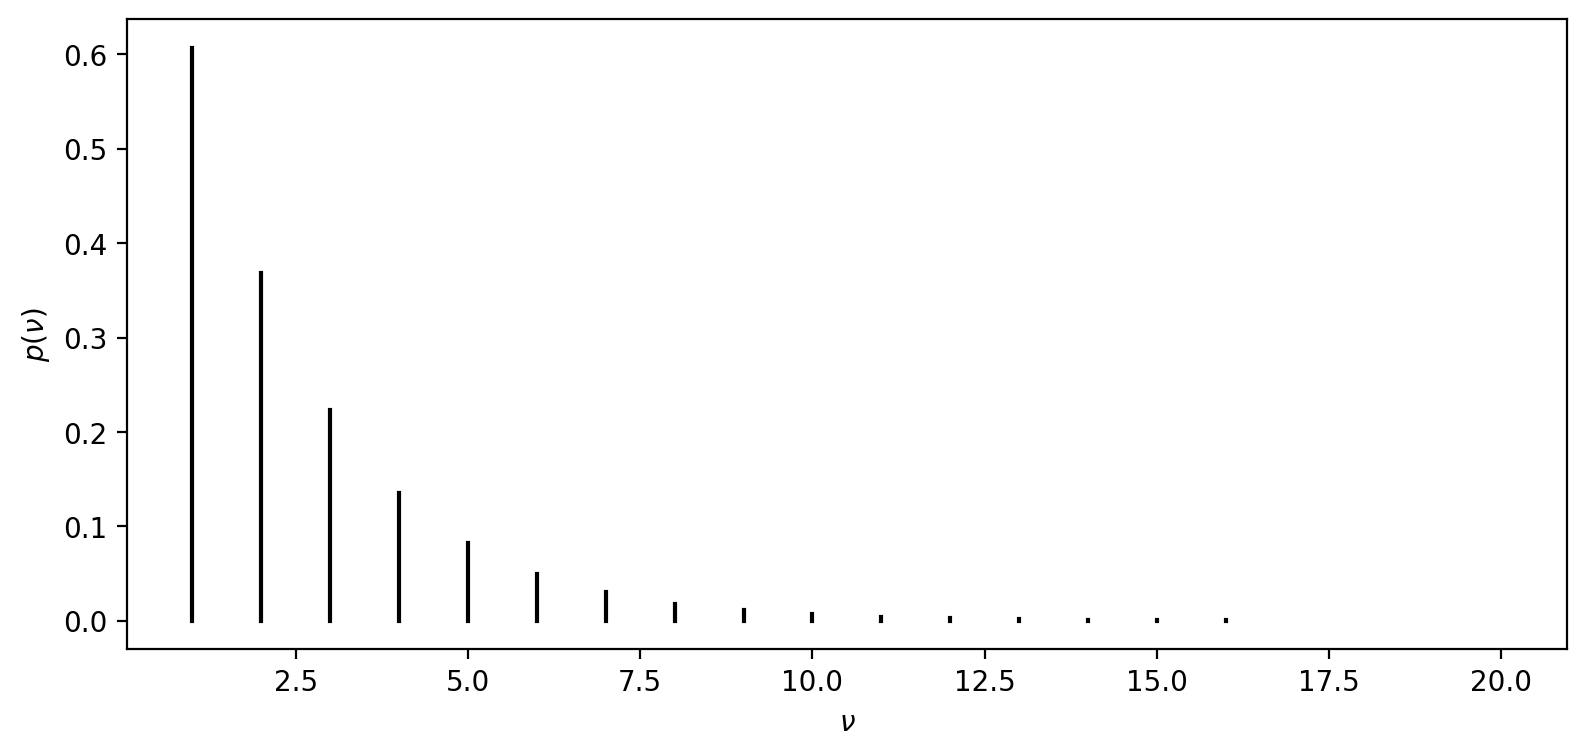

In [43]:
# distr. previa de nu
la0 = 1
# rango nu
nus = np.linspace(1,20,num = 20)
# Grafico
f = plt.figure(figsize = (8,3.5), dpi = 200)
ax = f.add_axes([0.1,0.1,0.9,0.9])
for nu in nus:
    ax.plot([nu,nu],[0,np.exp(-nu/2)], color = 'black')

ax.set_xlabel(r'$\nu$')
ax.set_ylabel(r'$p(\nu)$')
plt.show()

In [44]:
# distr. previa de upsilon
al0 = 2 * (1/2)**(-2)
al0

8.0

In [45]:
be0 = al0/np.var(y,ddof = 1)
be0

4.078888265802902

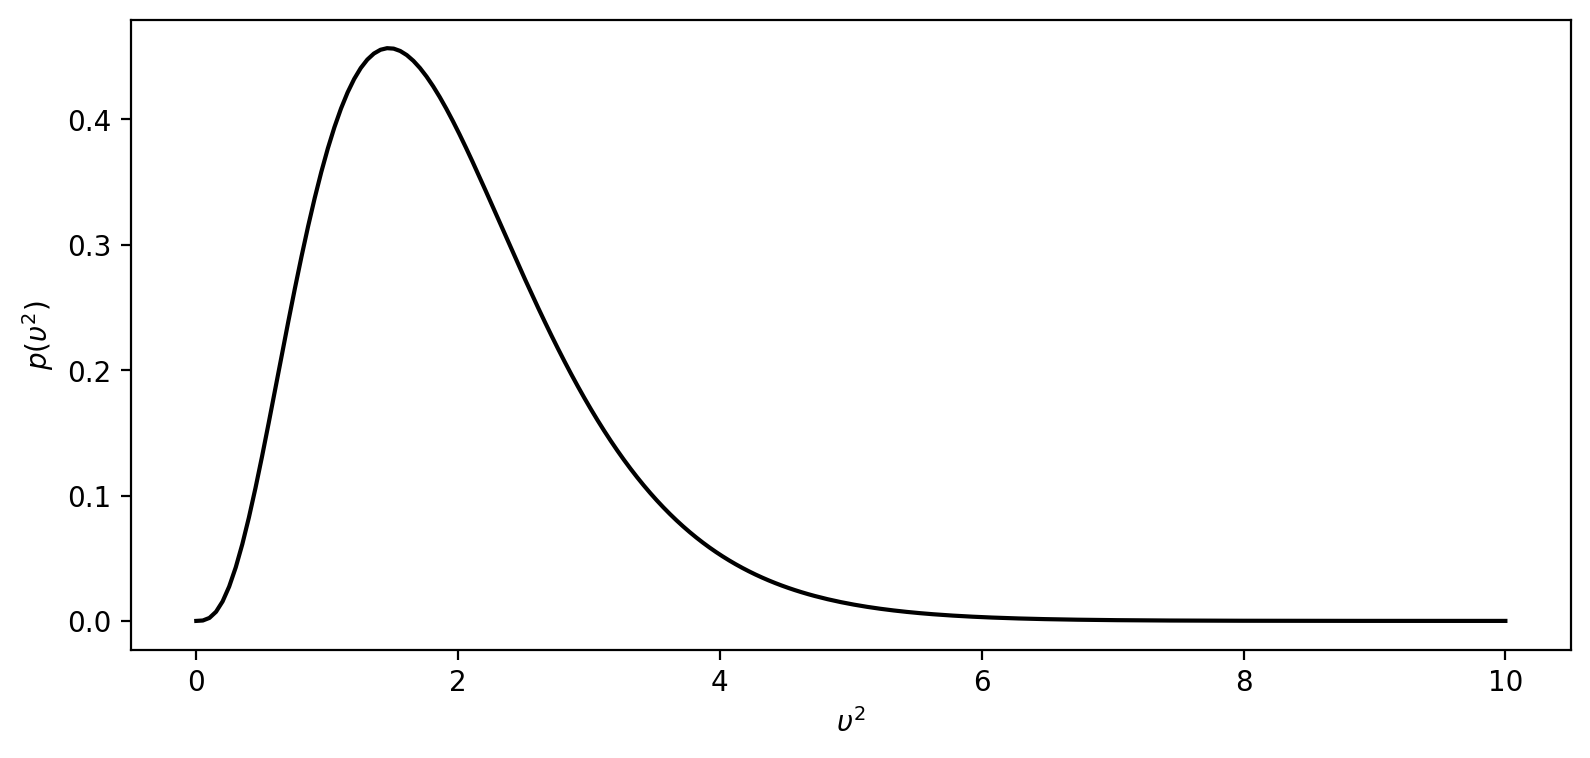

In [46]:
f = plt.figure(figsize = (8,3.5), dpi = 200)
ax = f.add_axes([0.1,0.1,0.9,0.9])

up_grid = np.linspace(0,10,num = 200)
ax.plot(up_grid,st.gamma.pdf(up_grid,al0/2,scale = 2/be0), color = 'black')
ax.set_xlabel(r'$\upsilon^2$')
ax.set_ylabel(r'$p(\upsilon^2)$')
plt.show()


#### Matriz de diseño

Se define la matriz de diseño tal que $\boldsymbol{x}_j=(x_{j,1},\ldots,x_{j,12})$ con

- $x_{j,1}  = 1$.
- $x_{j,2}  = 1$ si $\text{tipo}_j = \text{eri}$    y $x_{2,j} = 0$ en otro caso.
- $x_{j,3}  = 1$ si $\text{tipo}_j = \text{d.buoy}$ y $x_{3,j} = 0$ en otro caso.
- $x_{j,4}  = 1$ si $\text{tipo}_j = \text{f.buoy}$ y $x_{4,j} = 0$ en otro caso.
- $x_{j,5}  = \text{latitud}_{j}$.
- $x_{j,6}  = \text{latitud}_{j}\times x_{2_j}$.
- $x_{j.7}  = \text{latitud}_{j}\times x_{3_j}$.
- $x_{j,8}  = \text{latitud}_{j}\times x_{4_j}$.
- $x_{j,9}  = \text{longitud}_{j}$.
- $x_{j,10} = \text{longitud}_{j}\times x_{2_j}$.
- $x_{j,11} = \text{longitud}_{j}\times x_{3_j}$.
- $x_{j,12} = \text{longitud}_{j}\times x_{4_j}$

de forma que

- Si $\text{tipo}_j = \text{bucket}$, entonces:
$$
\textsf{E}(\mu_j\mid\boldsymbol{x}_j,\boldsymbol{\beta}) = \beta_1 + \beta_5\,\text{latitud}_j + \beta_9\,\text{longitud}_j\,.
$$
- Si $\text{tipo}_j = \text{eri}$, entonces:
$$
\textsf{E}(\mu_j\mid\boldsymbol{x}_j,\boldsymbol{\beta}) = (\beta_1+\beta_2) + (\beta_5+\beta_6)\,\text{latitud}_j + (\beta_9+\beta_{10})\,\text{longitud}_j\,.
$$
- Si $\text{tipo}_j = \text{d.buoy}$, entonces:
$$
\textsf{E}(\mu_j\mid\boldsymbol{x}_j,\boldsymbol{\beta}) = (\beta_1+\beta_3) + (\beta_5+\beta_7)\,\text{latitud}_j + (\beta_9+\beta_{11})\,\text{longitud}_j\,.
$$
- Si $\text{tipo}_j = \text{f.buoy}$, entonces:
$$
\textsf{E}(\mu_j\mid\boldsymbol{x}_j,\boldsymbol{\beta}) = (\beta_1+\beta_4) + (\beta_5+\beta_8)\,\text{latitud}_j + (\beta_9+\beta_{12})\,\text{longitud}_j\,.
$$


In [47]:
# matriz de diseño
X1   = np.ones(m).reshape((m,1))
X5   = np.array(df.lat).reshape((m,1))
X9   = np.array(df.lon).reshape((m,1))
X2   = np.repeat([0,1,0,0],[m1,m2,m3,m4]).reshape((m,1))
X3   = np.repeat([0,0,1,0],[m1,m2,m3,m4]).reshape((m,1))
X4   = np.repeat([0,0,0,1],[m1,m2,m3,m4]).reshape((m,1))
X    = np.hstack([X1,X2,X3,X4,X5,X2*X5,X3*X5,X4*X5,X9,X2*X9,X3*X9,X4*X9])
m, p = X.shape
m, p

(86, 12)

#### Implementación

In [48]:
# n de parametros
2*m + p + 3

187

In [49]:
# Iteraciones
nskip = 100
nburn = 1000
niter = 1000

In [50]:
# ajuste del modelo
muestras  = MCMC(niter, nburn, nskip, y, X, nj, al0, be0, la0, nus, verbose = True, seed = 1)
np.savez('muestras_regr2.npz',**muestras)

#### Cadena de la log-verosimilitud

In [51]:
# Cargar muestras
muestras = np.load('muestras_regr2.npz')

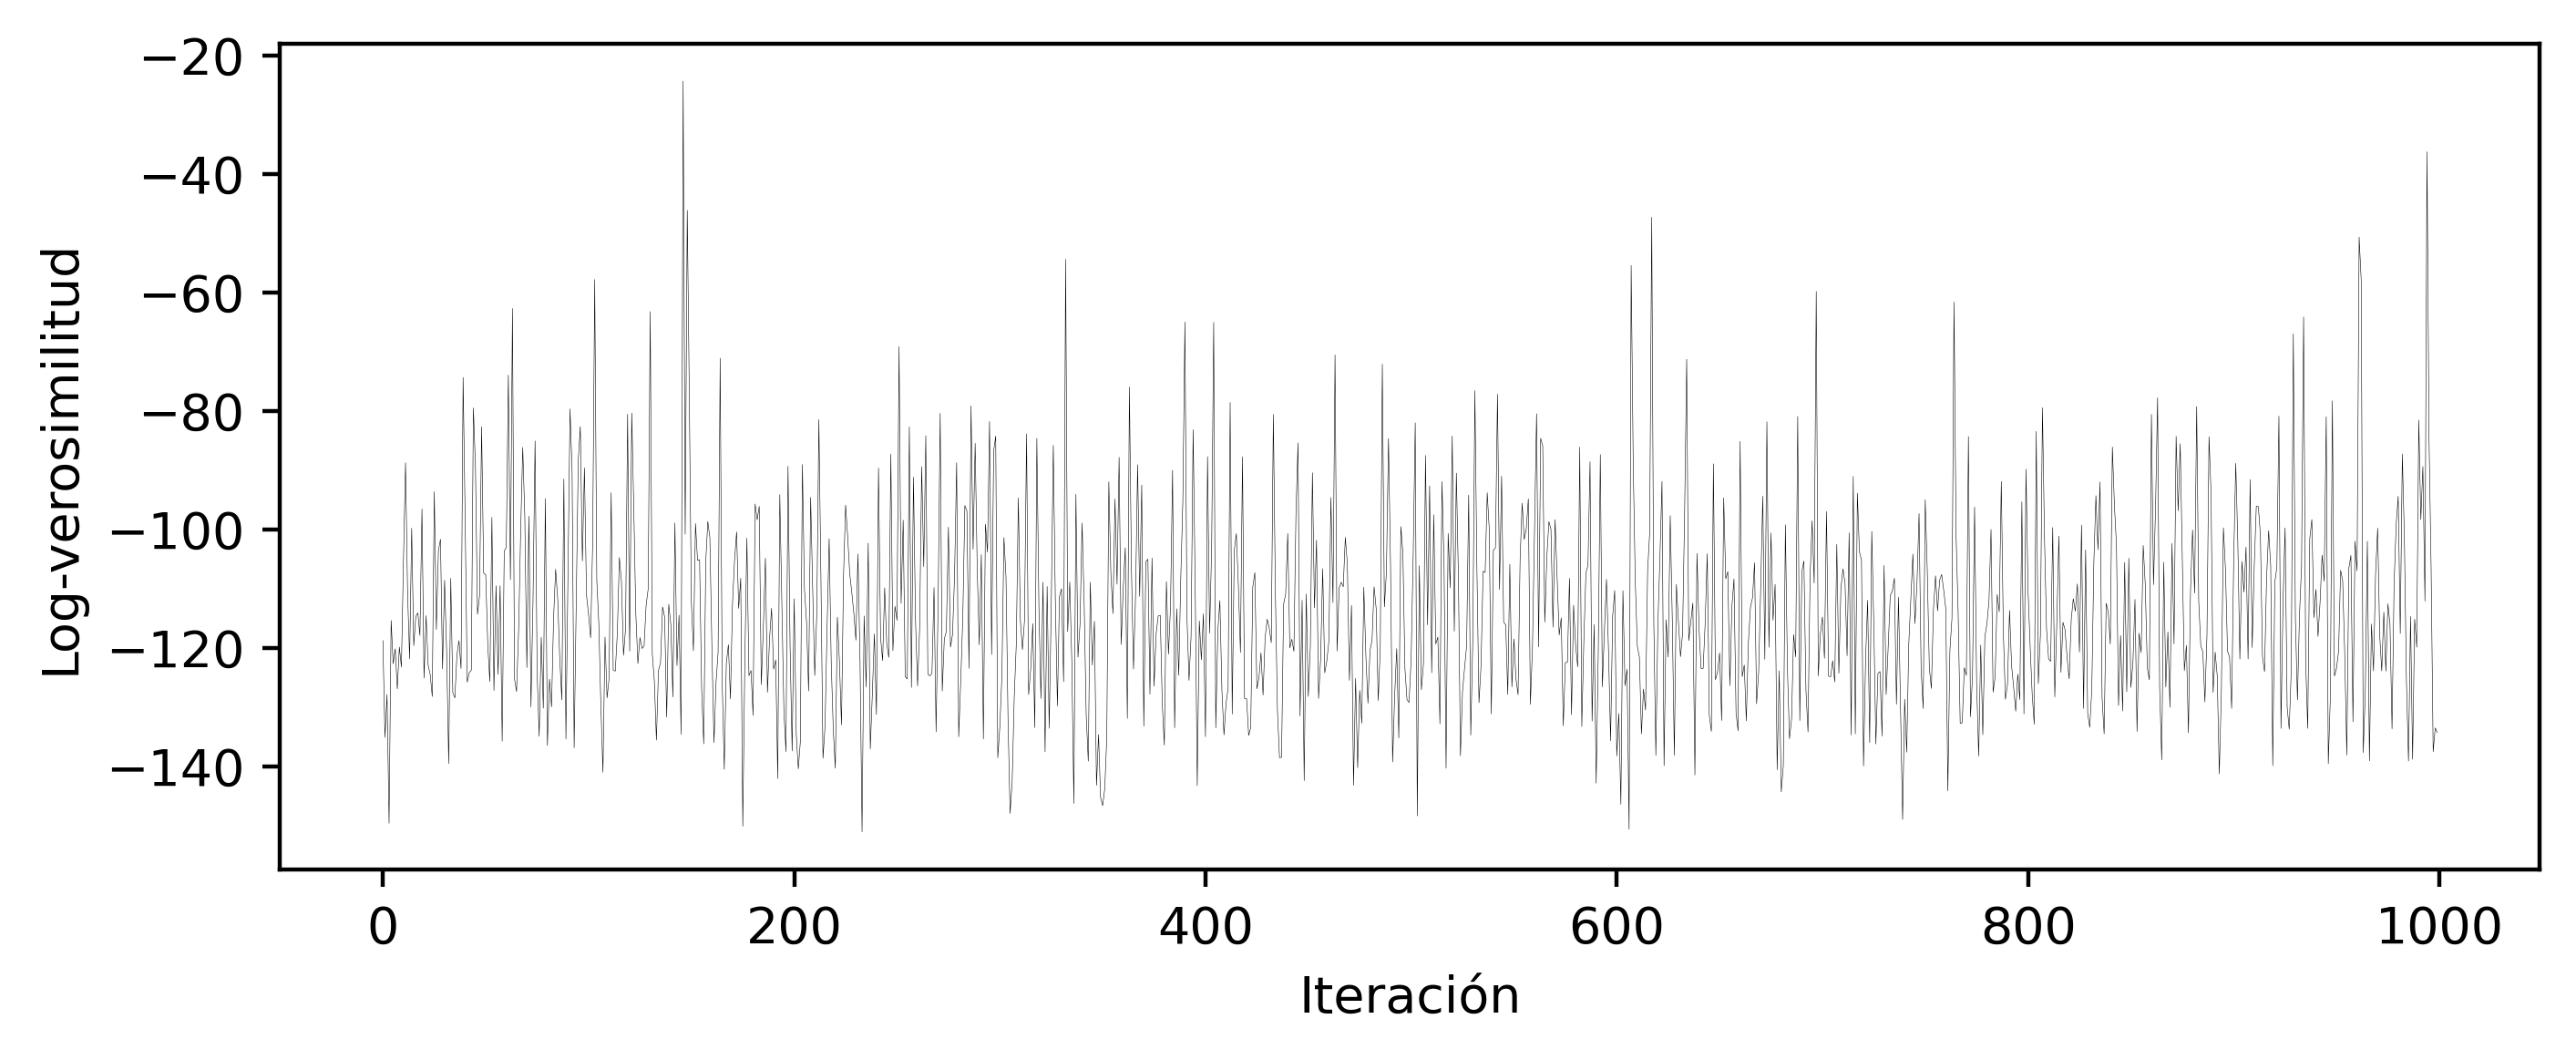

In [52]:
fig = plt.figure(figsize = (8,3), dpi = 400)
ax = fig.add_subplot(111)
ax.plot(range(niter), muestras['LP'],linewidth = 0.1, color = "black")
ax.set_xlabel("Iteración")
ax.set_ylabel("Log-verosimilitud")
plt.show()

#### Errores estándar de Monte Carlo

In [53]:
EEMC = [
    av.mcse(muestras['MU'][:,k],method = 'sd') for k in range(m)
] + [
    av.mcse(muestras['SIG2'][:,k],method = 'sd') for k in range(m)
] + [
    av.mcse(muestras['BET'][:,k],method = 'sd') for k in range(12)
] + [
    av.mcse(muestras['TAU2'],method = 'sd')
] + [
    av.mcse(muestras['UPS2'],method = 'sd')
]
pd.DataFrame({'EEMC' : EEMC}).describe().T

count      mean       std       min      25%       50%       75%  \
EEMC  186.0  0.084776  0.158302  0.002319  0.01694  0.024667  0.085984   

           max  
EEMC  1.337905

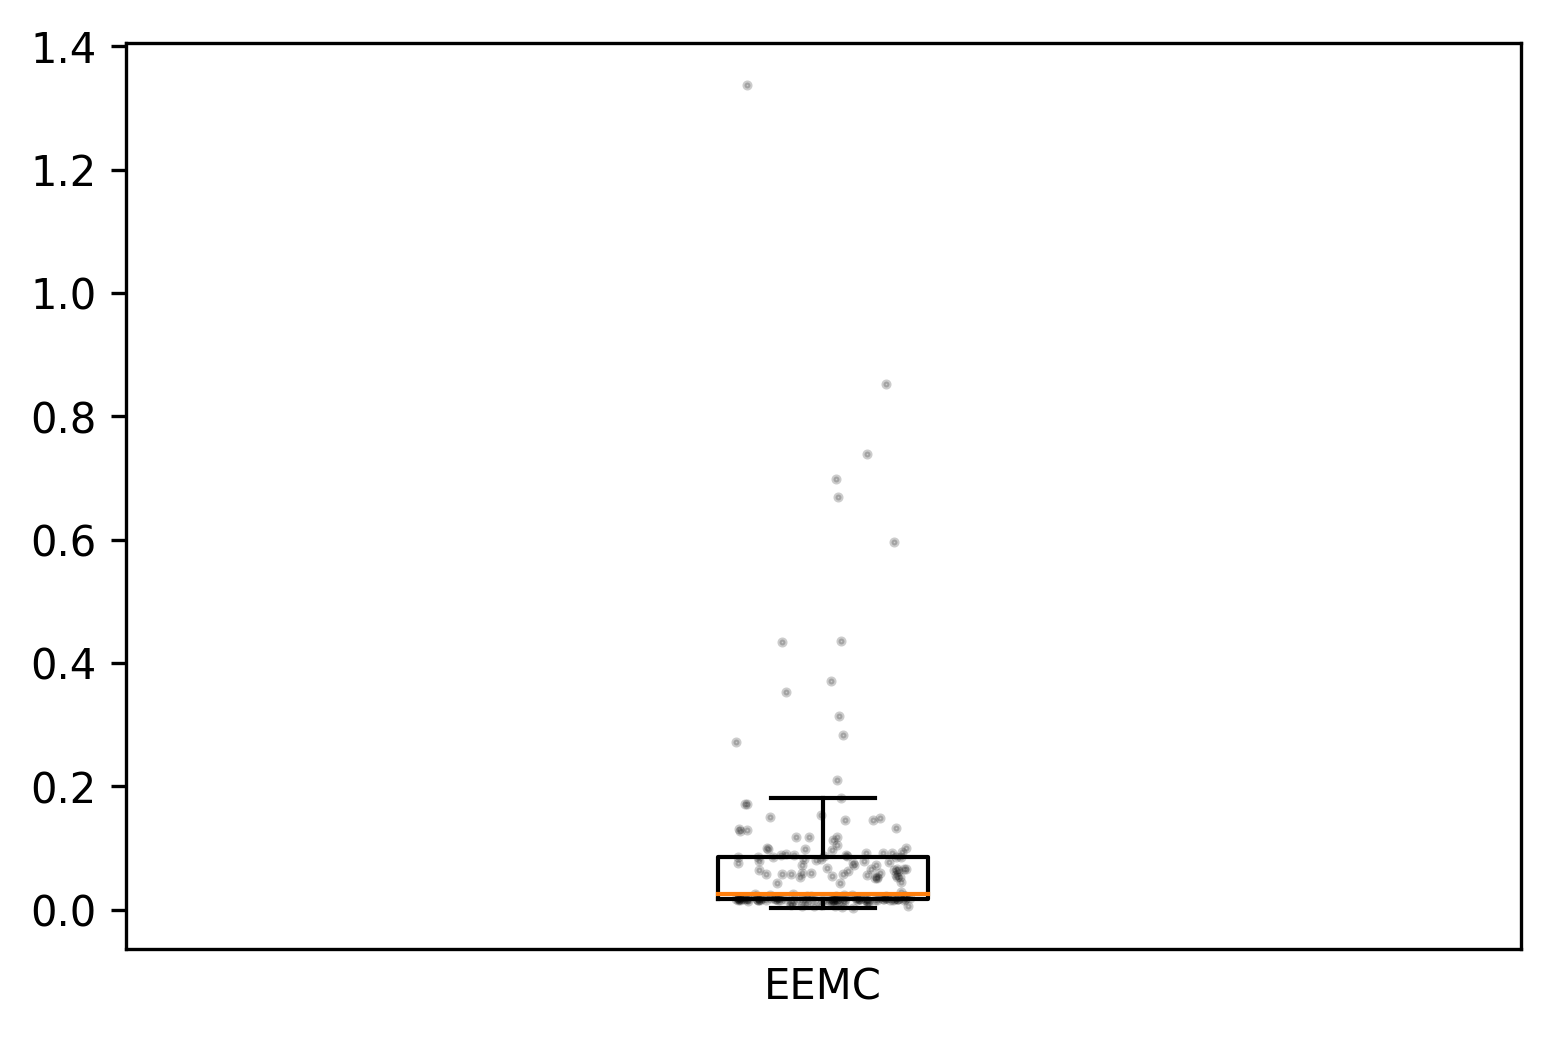

In [54]:
fig = plt.figure(figsize = (6,4), dpi = 300)
ax = fig.add_subplot(111)
#
wd = 1/8
ax.boxplot(EEMC,showfliers = False)
ax.scatter(x = 1 - wd/2 + np.random.random(len(EEMC))*wd,y = EEMC,s = 2,alpha = 0.2,c = 'black')
#
ax.set_xlabel('EEMC')
ax.set_xticks(ticks = [0],labels = None)
plt.show()

### 7.5 Inferencia

In [55]:
def summ(x):
    return [np.mean(x), np.std(x,ddof = 1)] + list(np.quantile(x,q = [0.025,0.975]))

musumm   = np.array([summ(muestras['MU'][:,k]) for k in range(m)])
sig2summ = np.array([summ(muestras['SIG2'][:,k]) for k in range(m)])
betsumm  = np.array([summ(muestras['BET'][:,k]) for k in range(p)])
colo     = np.repeat(['#aaaaaa','#0FB8F4','#F40F64','#0FF45E'],[m1,m2,m3,m4])

#### Medias específicas $\mu_j$

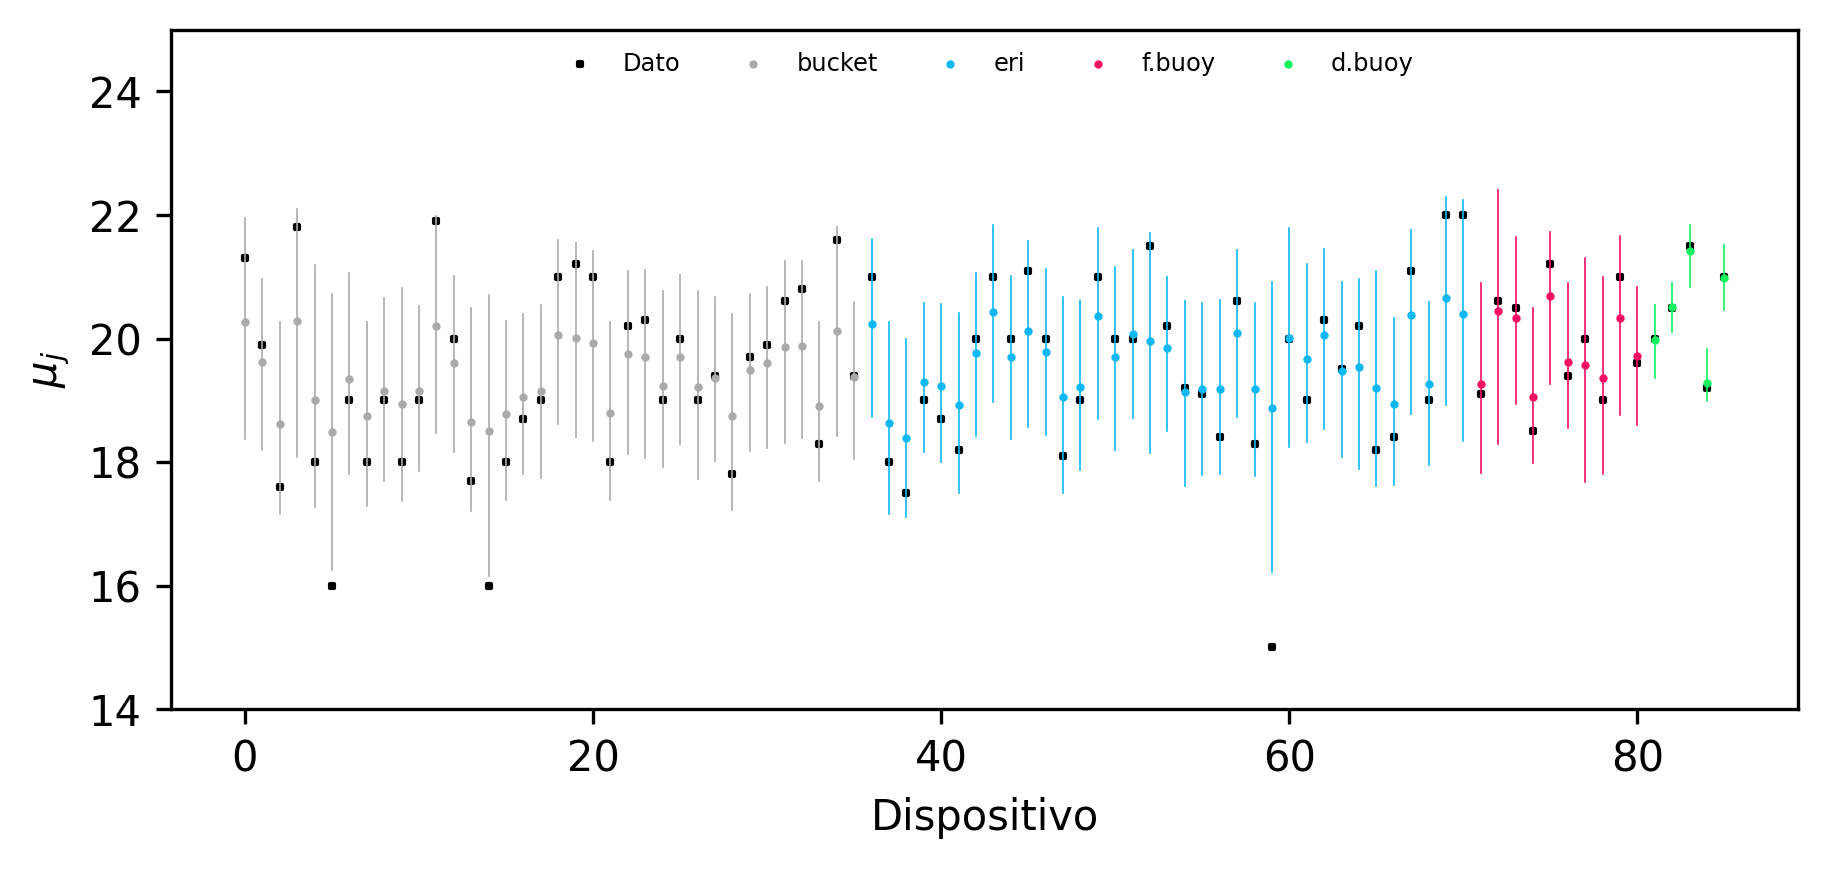

In [56]:
fig = plt.figure(figsize = (7,3), dpi = 300)
ax = fig.add_subplot(111)
ax.set_ylim((14,25))

for j in range(m):
    ax.plot([j,j],musumm[j,[2,3]],color = colo[j],linewidth = 0.4)

ax.scatter(range(m),y, s = 1,marker = 's',c = 'black',label = 'Dato')
ax.scatter(range(m1),musumm[:m1,0],s = 1, c = '#aaaaaa',label = 'bucket')
ax.scatter(range(m1,m1+m2),musumm[m1:(m1+m2),0],s = 1, c = '#0FB8F4',label = 'eri')
ax.scatter(range(m1+m2,m1+m2+m3),musumm[(m1+m2):(m1+m2+m3),0],s = 1, c = '#F40F64',label = 'f.buoy')
ax.scatter(range(m1+m2+m3,m),musumm[(m1+m2+m3):m,0],s = 1, c = '#0FF45E',label = 'd.buoy')

ax.set_xlabel('Dispositivo')
ax.set_ylabel('$\mu_j$')
ax.legend(loc = 9,ncol = 5,frameon = False,fontsize = 'xx-small')
plt.show()

#### Varianzas específicas $\sigma^2_j$

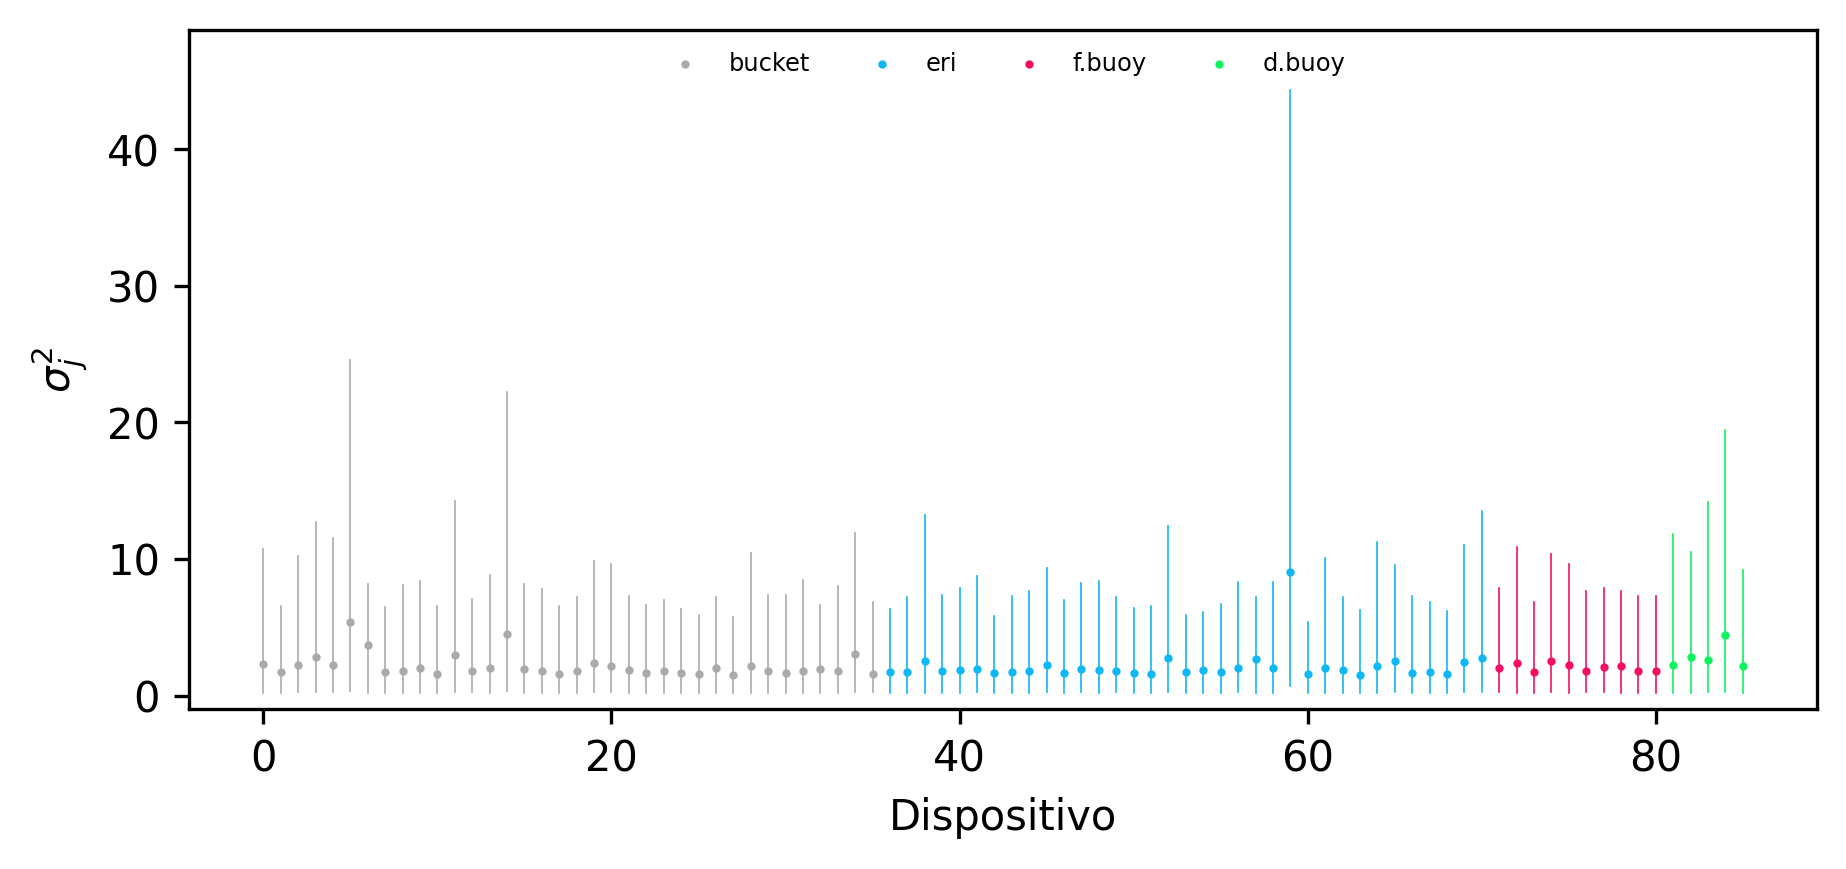

In [57]:
fig = plt.figure(figsize = (7,3), dpi = 300)
ax = fig.add_subplot(111)
ax.set_ylim((-1,np.max(sig2summ[:,3])*1.1))

for j in range(m):
    ax.plot([j,j],sig2summ[j,[2,3]],color = colo[j],linewidth = 0.4)

ax.scatter(range(m1),sig2summ[:m1,0],s = 1, c = '#aaaaaa',label = 'bucket')
ax.scatter(range(m1,m1+m2),sig2summ[m1:(m1+m2),0],s = 1, c = '#0FB8F4',label = 'eri')
ax.scatter(range(m1+m2,m1+m2+m3),sig2summ[(m1+m2):(m1+m2+m3),0],s = 1, c = '#F40F64',label = 'f.buoy')
ax.scatter(range(m1+m2+m3,m),sig2summ[(m1+m2+m3):m,0],s = 1, c = '#0FF45E',label = 'd.buoy')

ax.set_xlabel('Dispositivo')
ax.set_ylabel('$\sigma^2_j$')
ax.legend(loc = 9,ncol = 4,frameon = False,fontsize = 'xx-small')
plt.show()

#### Componentes de varianza $\tau^2$, $\upsilon^2$, $\nu$ 

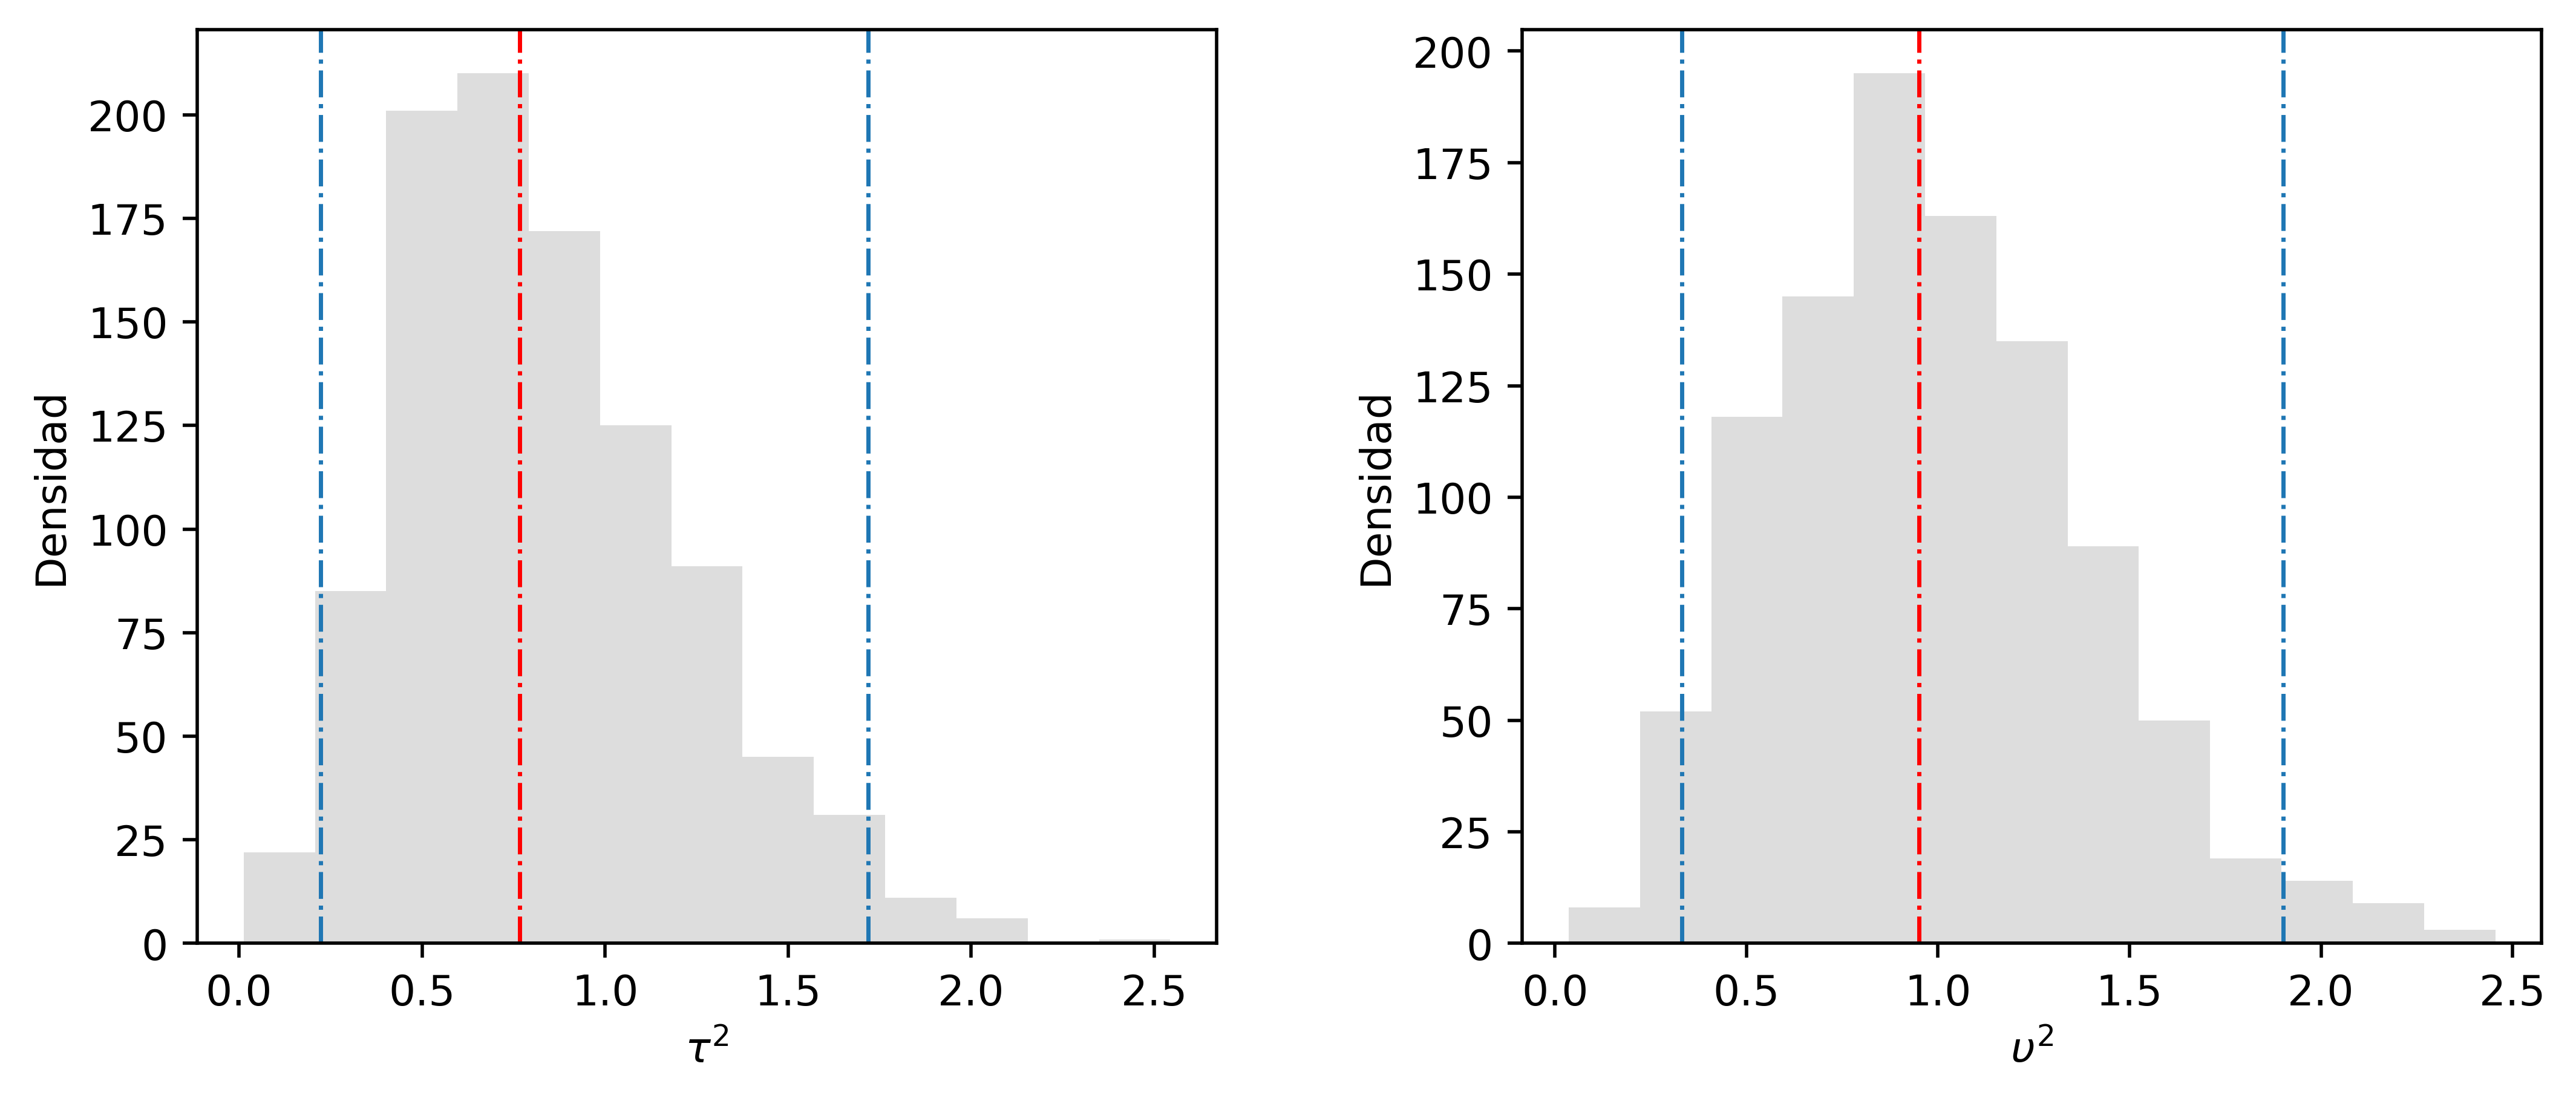

In [58]:
f, ax = plt.subplots(1, 2, figsize = (10,4),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)
# Tau^2
ax[0].hist(muestras['TAU2'], color = '#dddddd',bins = 13)
ax[0].axvline(np.quantile(muestras['TAU2'],q = 0.025),ls = '-.',linewidth = 1)
ax[0].axvline(np.quantile(muestras['TAU2'],q = 0.975),ls = '-.',linewidth = 1)
ax[0].axvline(np.quantile(muestras['TAU2'],q = 0.5),ls = '-.',linewidth = 1, color = 'red')
ax[0].set_ylabel('Densidad')
ax[0].set_xlabel(r'$\tau^2$')
# Upsilon^2
ax[1].hist(muestras['UPS2'],color = '#dddddd',bins = 13)
ax[1].axvline(np.quantile(muestras['UPS2'],q = 0.025),ls = '-.',linewidth = 1)
ax[1].axvline(np.quantile(muestras['UPS2'],q = 0.975),ls = '-.',linewidth = 1)
ax[1].axvline(np.quantile(muestras['UPS2'],q = 0.5),ls = '-.',linewidth = 1, color = 'red')
ax[1].set_ylabel('Densidad')
ax[1].set_xlabel(r'$\upsilon^2$')

plt.show()

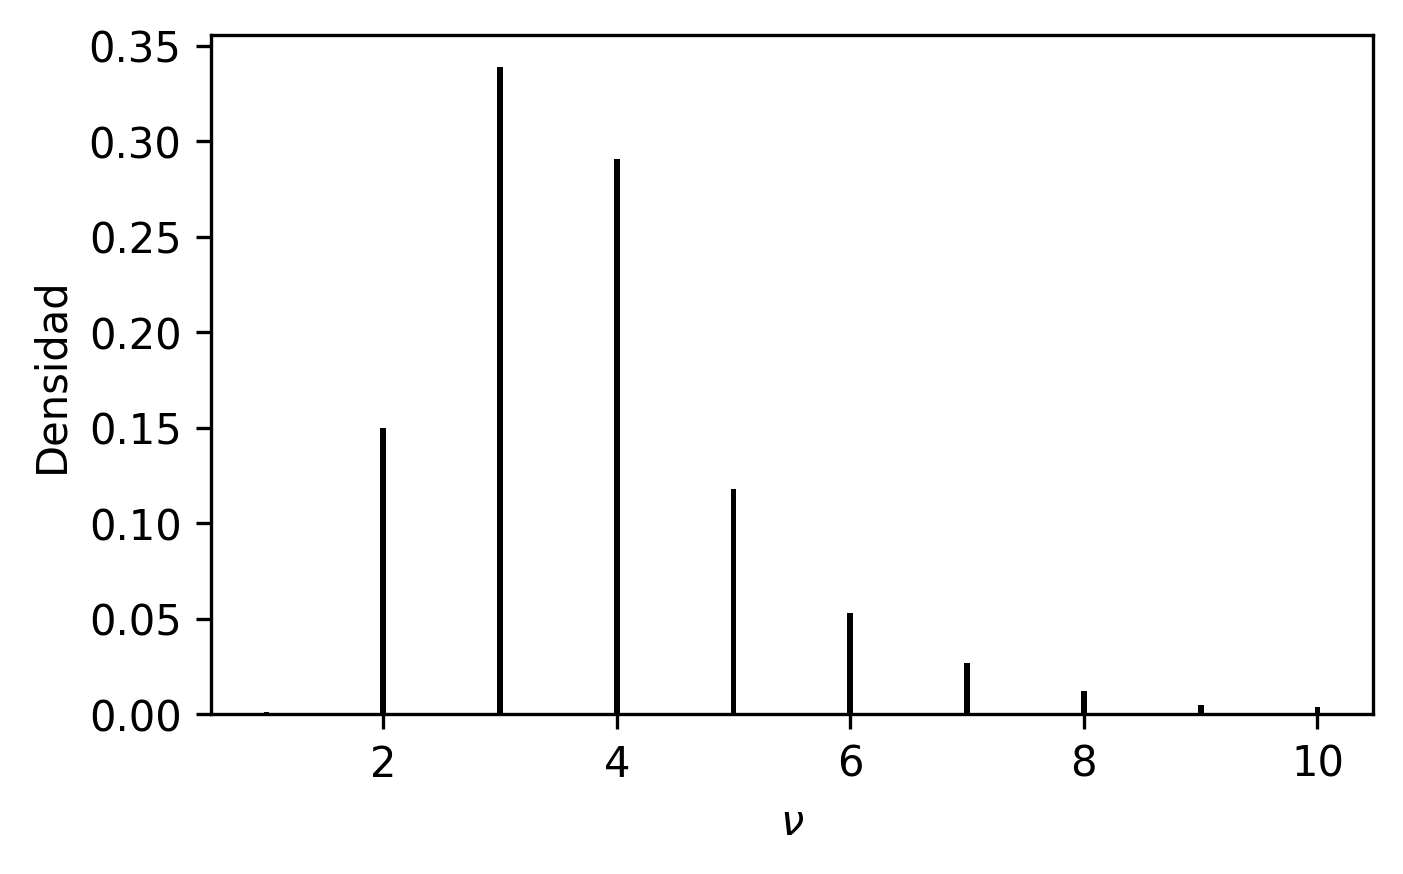

In [59]:
fig = plt.figure(figsize = (5,3), dpi = 300)
ax = fig.add_subplot(111)

tmp = pd.DataFrame(muestras['NU']).value_counts(sort = False)
ax.bar(range(1,11),np.array(tmp)/np.sum(tmp),width = 0.05,color = 'black')
ax.set_xlabel(r'$\nu$')
ax.set_ylabel('Densidad')

plt.show()

#### Coeficientes de la regesion $\boldsymbol{\beta}$

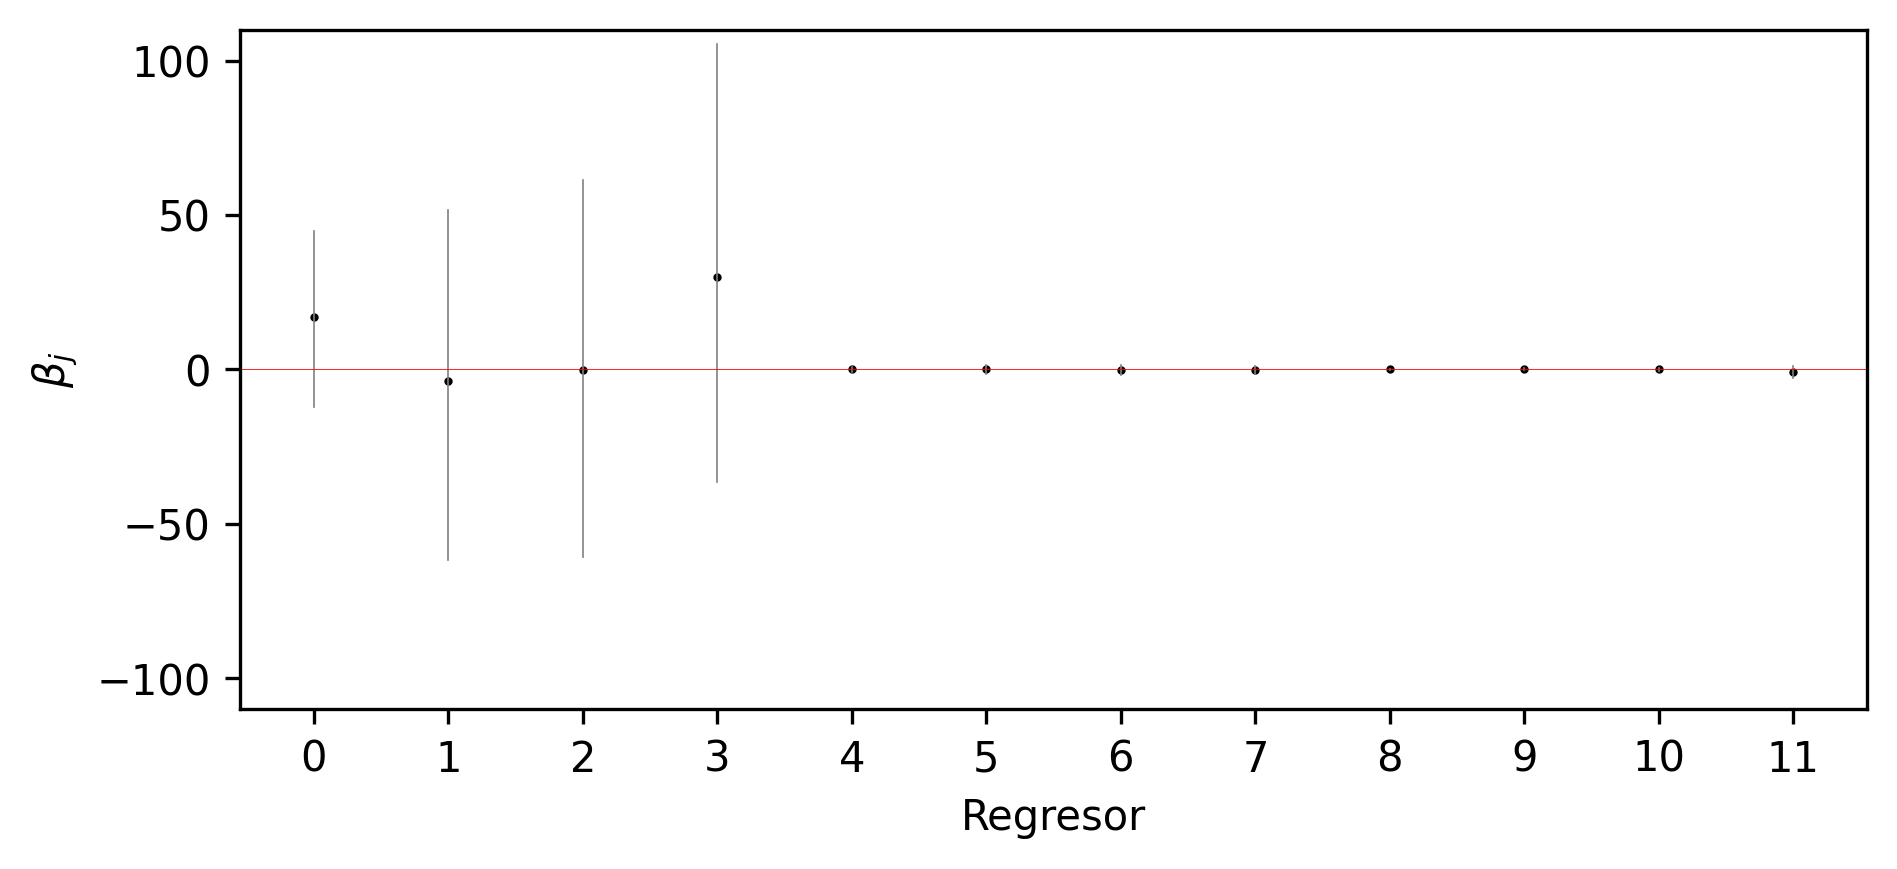

In [60]:
fig = plt.figure(figsize = (7,3), dpi = 300)
ax = fig.add_subplot(111)

for j in range(p):
    ax.plot([j,j],betsumm[j,[2,3]],color = 'gray',linewidth = 0.4)
ax.scatter(range(p),betsumm[:,0], s = 1,c = 'black')
ax.axhline(0, linewidth = 0.2,color = 'red')

ax.set_xticks(ticks = range(p),labels = range(p))
ax.set_xlabel('Regresor')
ax.set_ylabel(r'$\beta_j$')
ax.set_ylim((-110,110))

plt.show()

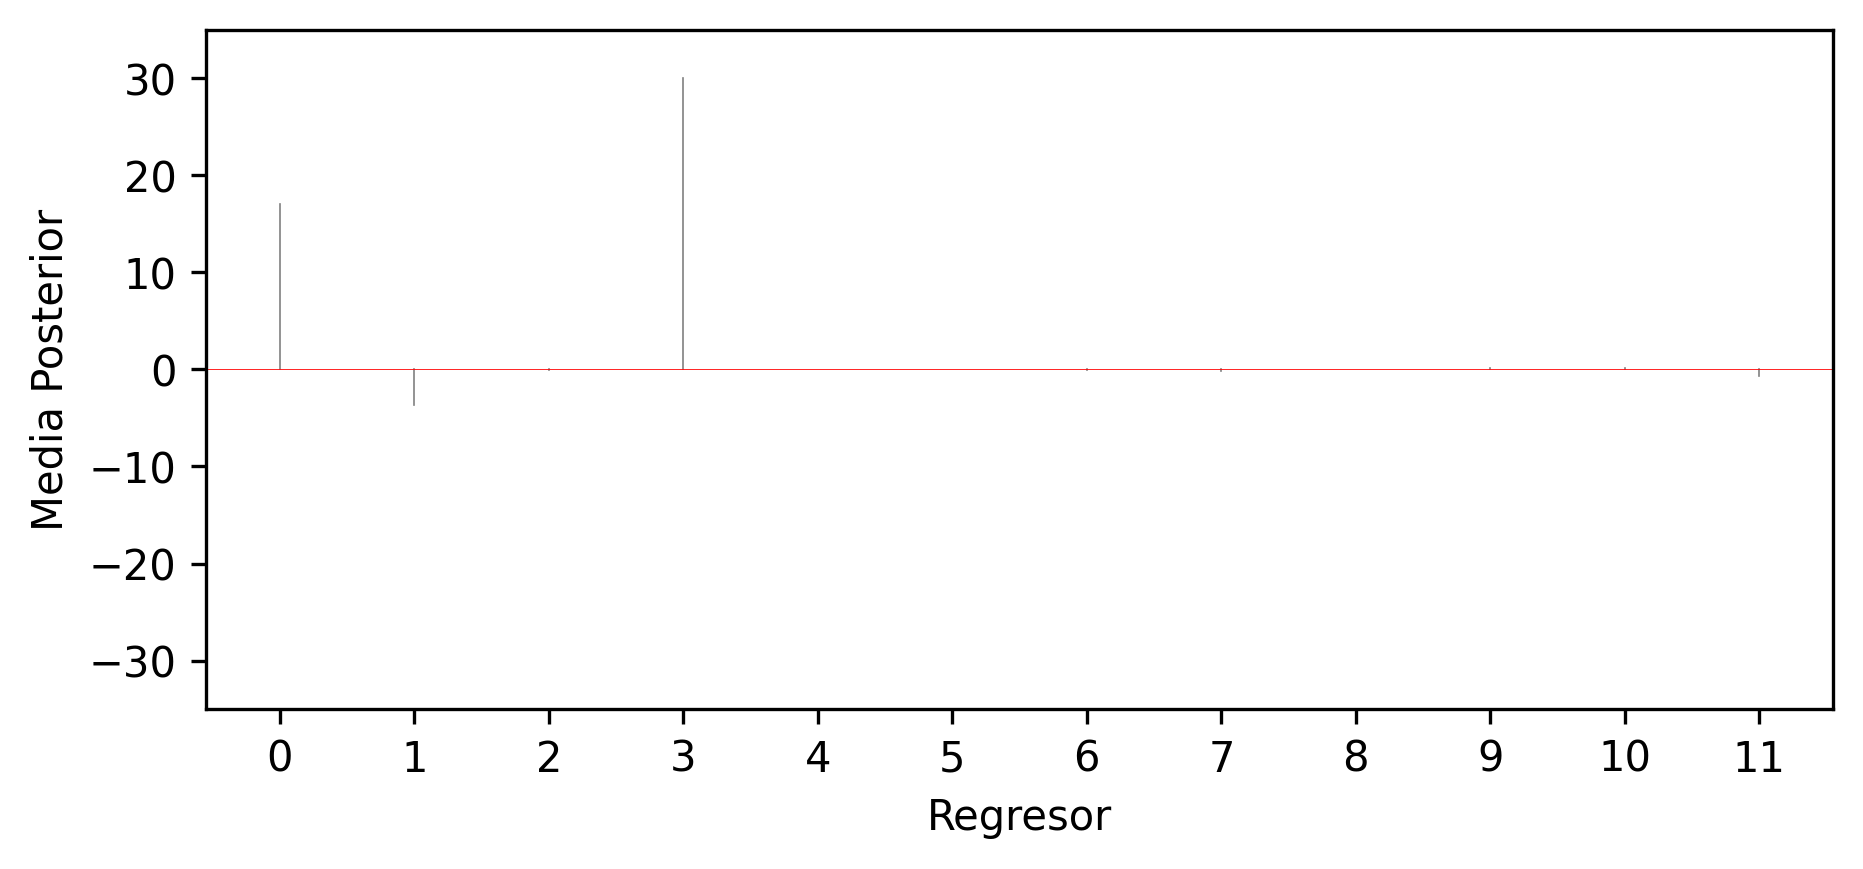

In [61]:
fig = plt.figure(figsize = (7,3), dpi = 300)
ax = fig.add_subplot(111)
ax.set_ylim((-35,35))

for j in range(p):
    ax.plot([j,j],[0,betsumm[j,0]],color = 'gray',linewidth = 0.4)
ax.axhline(0, linewidth = 0.2,color = 'red')

ax.set_xticks(ticks = range(p),labels = range(p))
ax.set_xlabel('Regresor')
ax.set_ylabel('Media Posterior')

plt.show()

### 7.6 Encogimiento

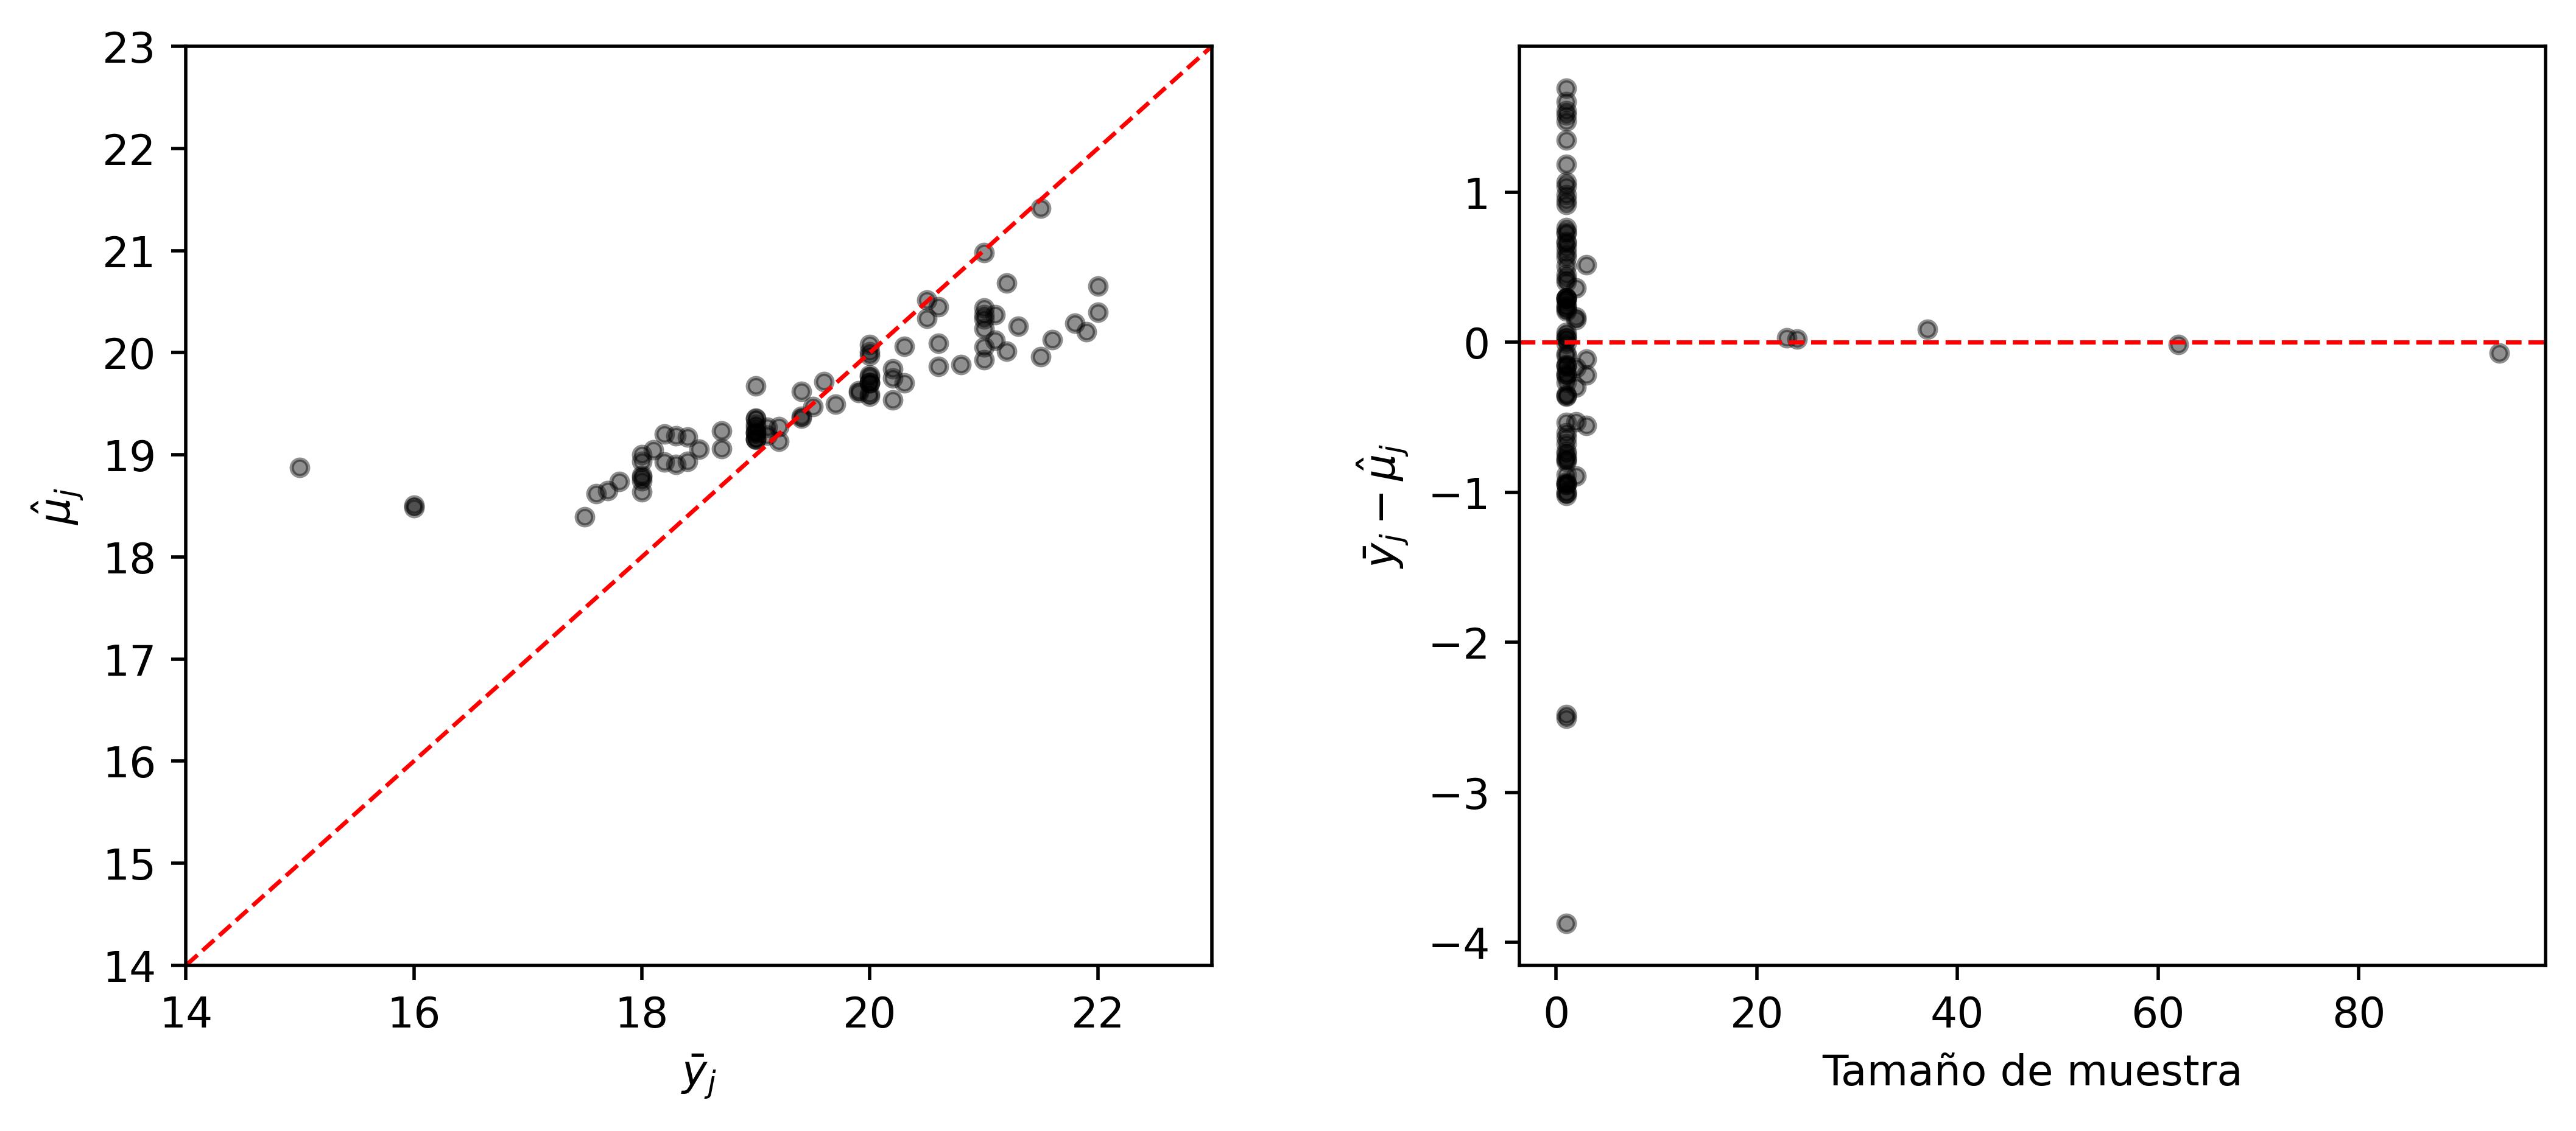

In [62]:
mu_hat = np.mean(muestras['MU'],axis = 0)

f, ax = plt.subplots(1, 2, figsize = (10,4),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.2)


ax[0].scatter(y, mu_hat, s = 15, c = '#00000070')
ax[0].plot([np.min(np.hstack([y,mu_hat]))-1,np.max(np.hstack([y,mu_hat])+1)],
          [np.min(np.hstack([y,mu_hat]))-1,np.max(np.hstack([y,mu_hat])+1)],
          color = 'red', ls = '--',linewidth = 1)

ax[0].set_ylim((np.min(np.hstack([y,mu_hat]))-1,np.max(np.hstack([y,mu_hat]))+1))
ax[0].set_xlim((np.min(np.hstack([y,mu_hat]))-1,np.max(np.hstack([y,mu_hat]))+1))
ax[0].set_xlabel(r'$\bar{y}_j$')
ax[0].set_ylabel(r'$\hat{\mu}_j$')


ax[1].scatter(nj,y-mu_hat, s = 15, c = '#00000070')
ax[1].axhline(0, color = 'red', ls = '--',linewidth = 1)

ax[1].set_xlabel('Tamaño de muestra')
ax[1].set_ylabel(r'$\bar{y}_j - \hat{\mu}_j$')

plt.show()

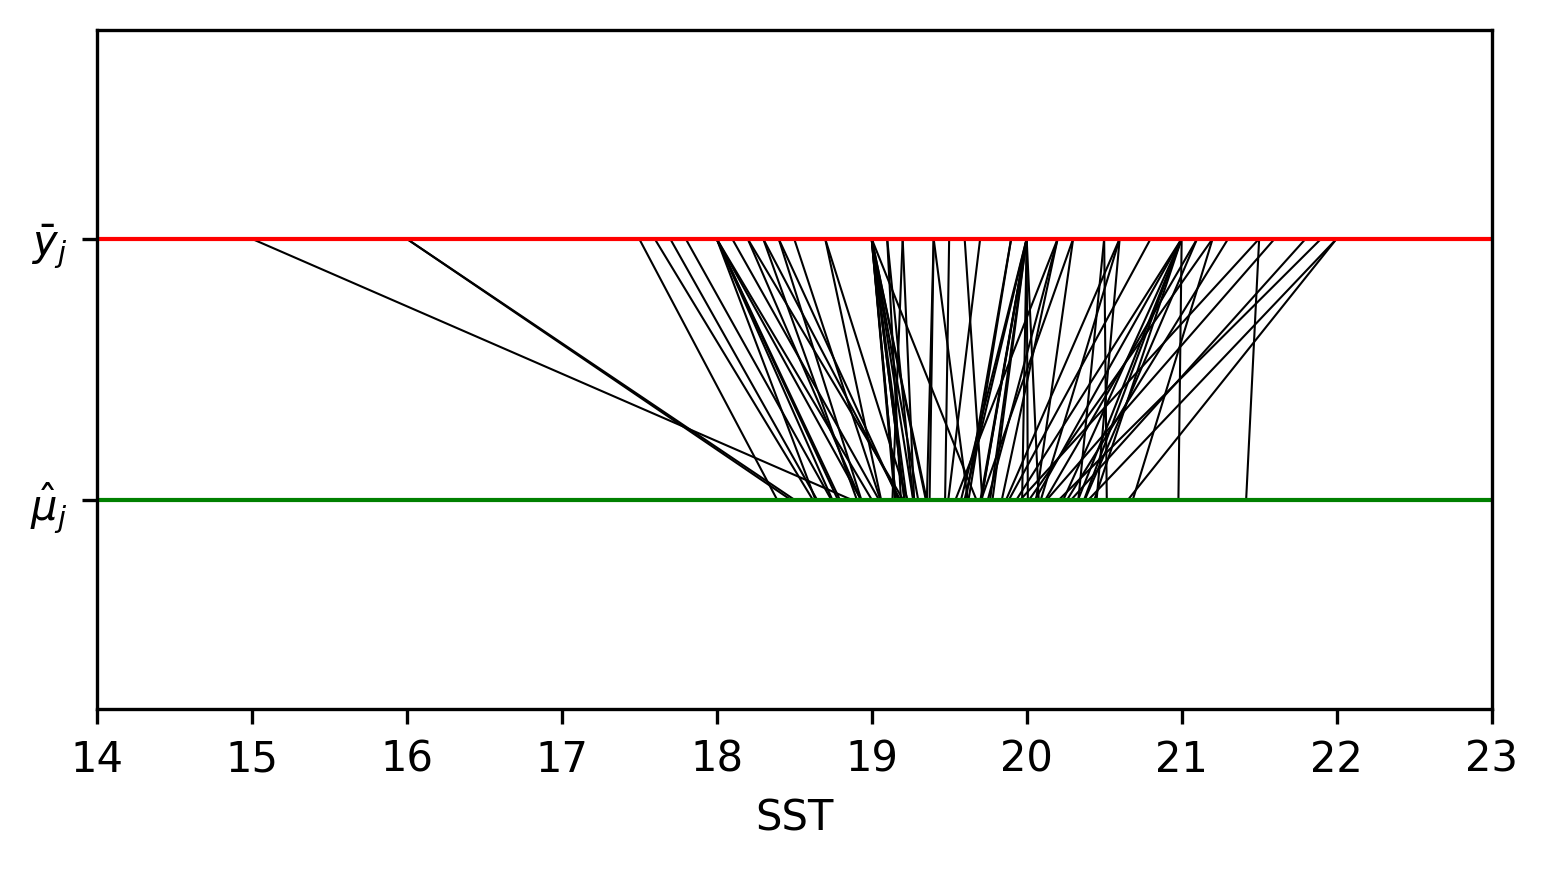

In [63]:
fig = plt.figure(figsize = (6,3), dpi = 300)
ax = fig.add_subplot(111)

for j in range(m):
    ax.plot([mu_hat[j],y[j]],[1,2],linewidth = 0.5, color = 'black')
ax.axhline(1,linewidth = 1, color = 'green')
ax.axhline(2,linewidth = 1, color = 'red')

ax.set_yticks(ticks = [1,2],labels = [r'$\hat{\mu}_j$',r'$\bar{y}_j$'])
ax.set_ylim((0.2,2.8))
ax.set_xlabel('SST')
ax.set_xlim((np.min(np.hstack([y,mu_hat]))-1,np.max(np.hstack([y,mu_hat]))+1))

plt.show()

### 7.7 Estadísticos de prueba

In [64]:
def test_stats(x):
    return [np.mean(x), 
     np.median(x), 
     np.std(x,ddof = 1), 
     np.diff(np.quantile(x,q = [0.025,0.975]))[0]]
ts_display = ['Media','Mediana','Desv. Estandar', 'Rango Intercuartilico']
TS = []
for b in range(niter):
    mu   = muestras['MU'][b,:]
    sig2 = muestras['SIG2'][b,:]
    TS.append(test_stats(st.norm.rvs(mu,scale = np.sqrt(sig2/nj),size = m)))
TS0 = test_stats(y)
TS = np.array(TS)

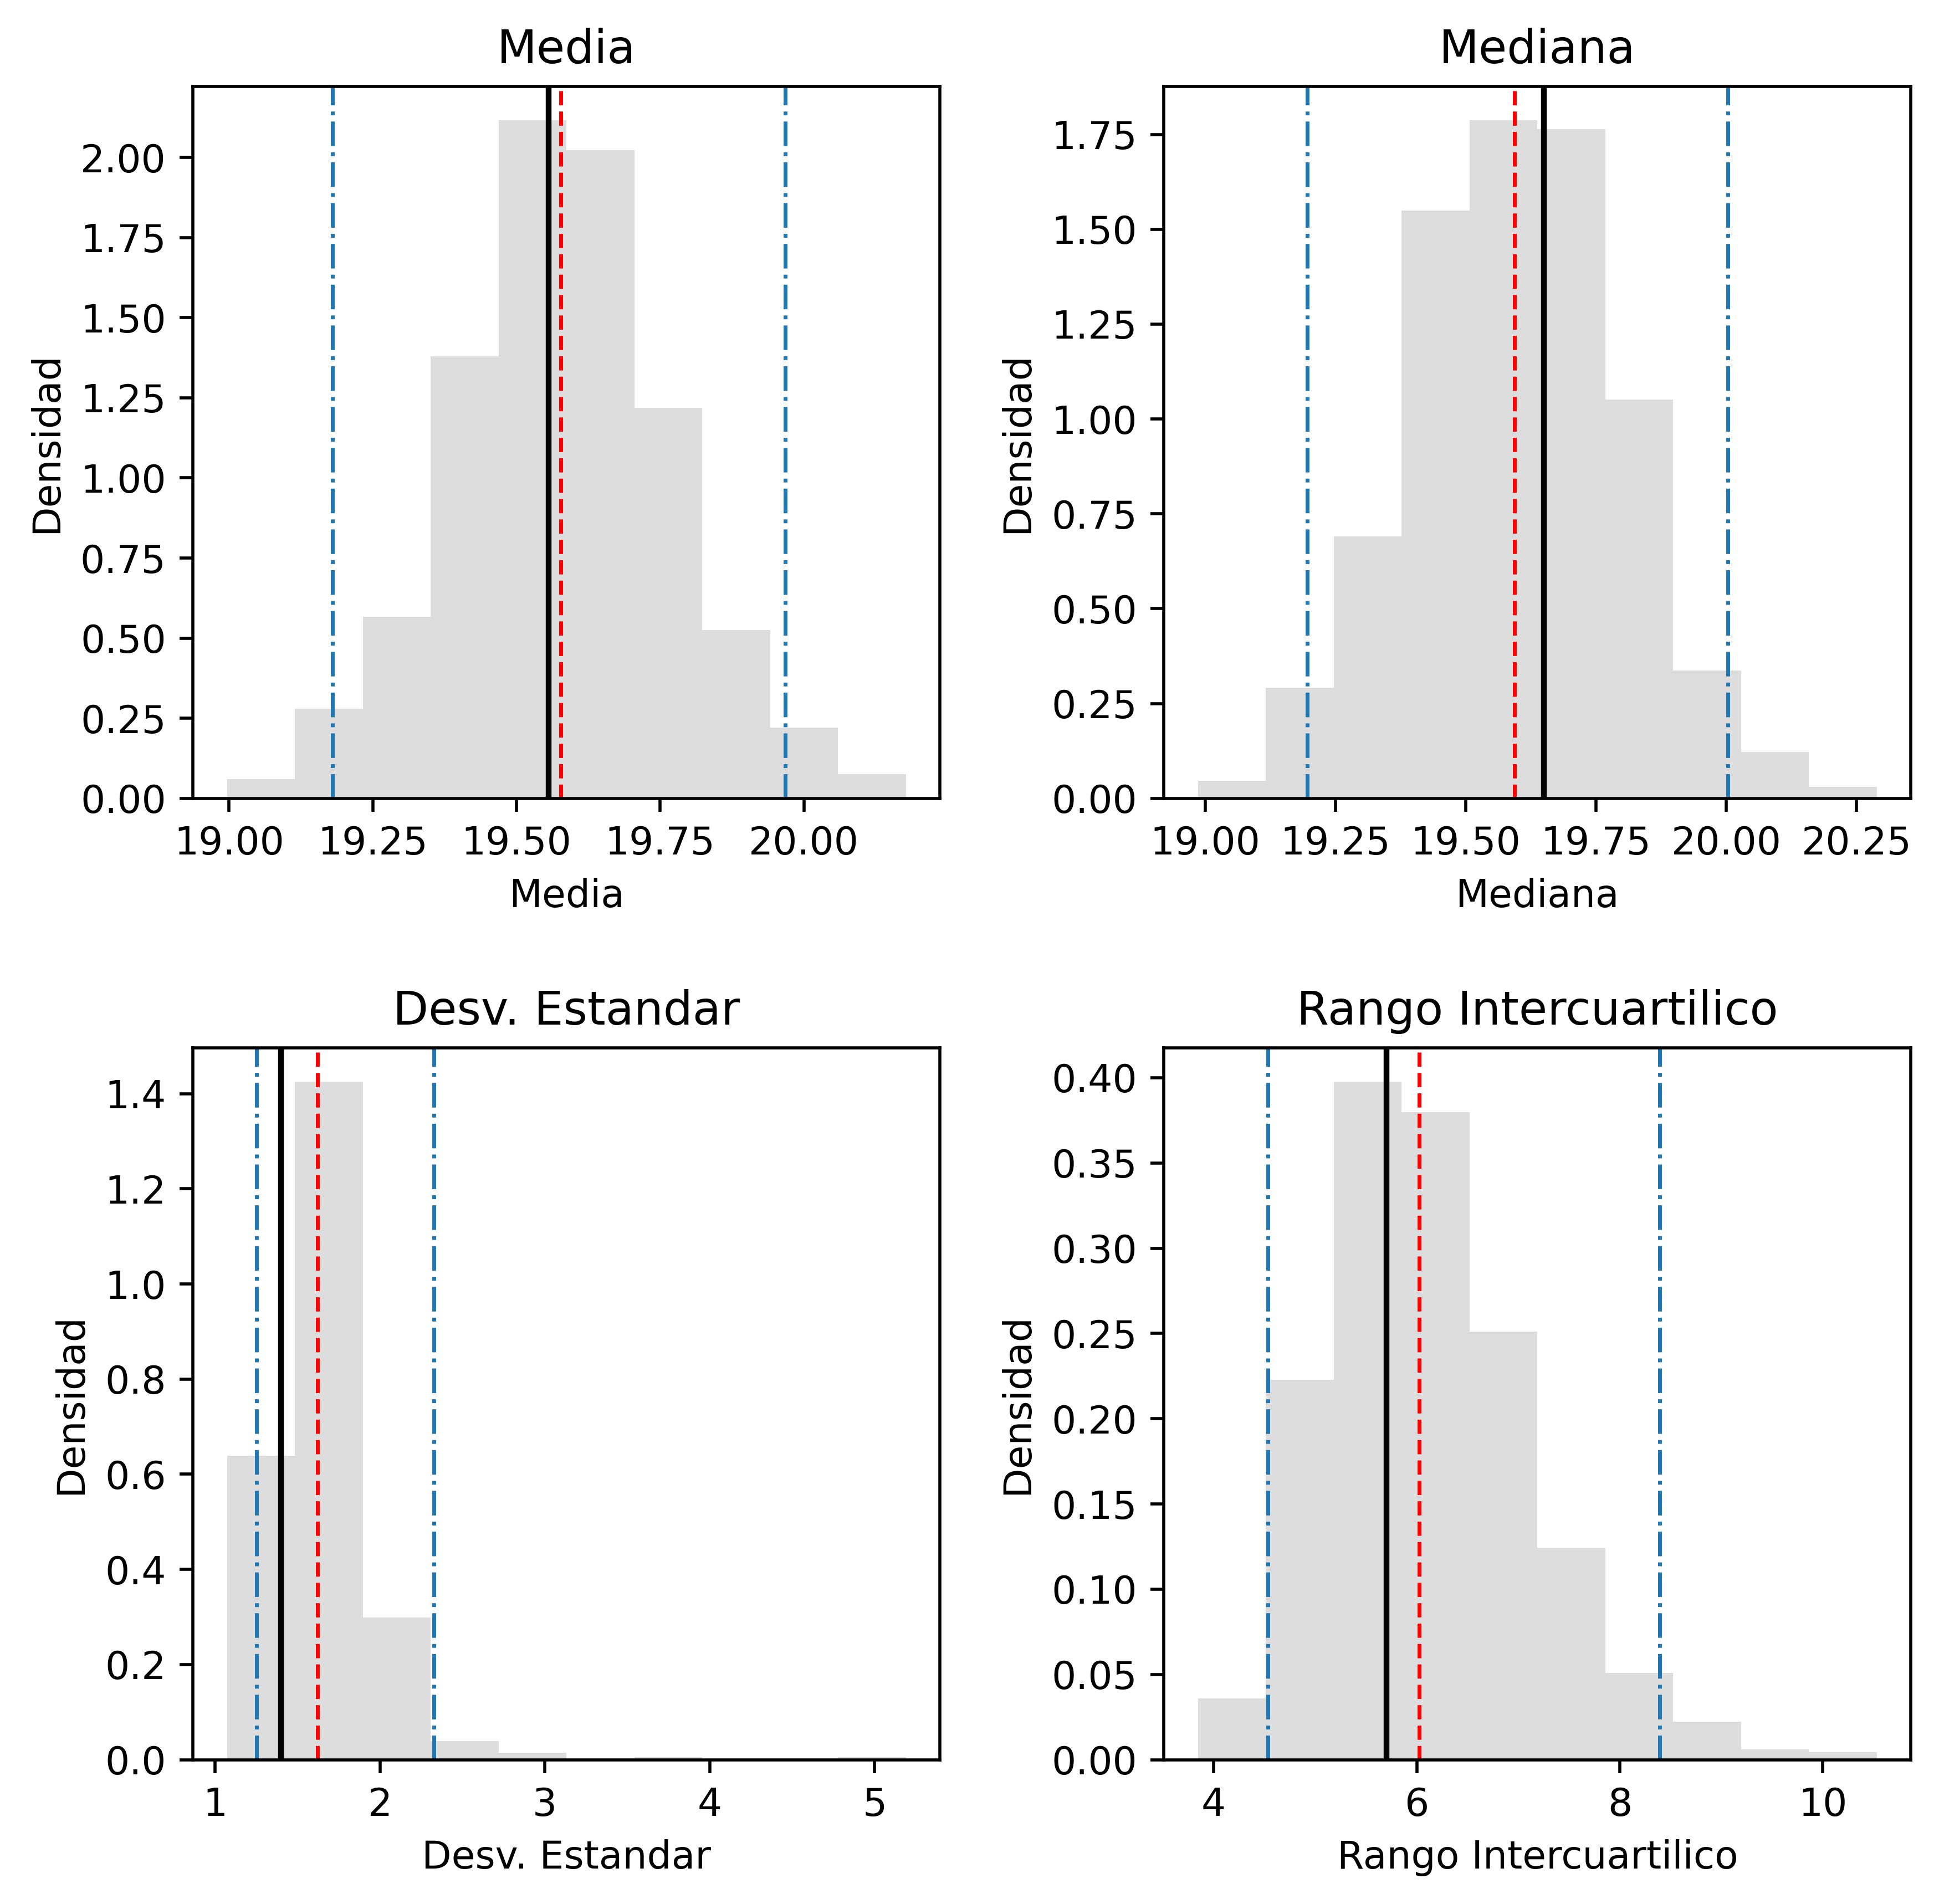

In [65]:
f, ax = plt.subplots(2, 2, figsize = (8,8),dpi = 500)
plt.subplots_adjust(wspace = 0.3, hspace = 0.35)
indexes = [[0,0],[0,1],[1,0],[1,1]]

for j in range(len(TS0)):
    ax[int(np.floor(j/2)),j%2].hist(TS[:,j],color = '#dddddd',density = True)
    ax[int(np.floor(j/2)),j%2].axvline(np.quantile(TS[:,j],q = 0.025),ls = '-.',linewidth = 1)
    ax[int(np.floor(j/2)),j%2].axvline(np.quantile(TS[:,j],q = 0.975),ls = '-.',linewidth = 1)
    ax[int(np.floor(j/2)),j%2].axvline(np.quantile(TS[:,j],q = 0.5),color = 'red', ls = '--',linewidth = 1)
    ax[int(np.floor(j/2)),j%2].axvline(TS0[j],color = 'black')
    ax[int(np.floor(j/2)),j%2].set_title(ts_display[j])
    ax[int(np.floor(j/2)),j%2].set_ylabel('Densidad')
    ax[int(np.floor(j/2)),j%2].set_xlabel(ts_display[j])
    

### 7.8 Predicción

In [66]:
# predicción
np.random.seed(1)
# tamaño del grupo
g  = df.type
j1 = np.random.choice(np.where((g == 'bucket') & (nj == np.max(nj[g == 'bucket'])))[0],size = 1)
j2 = np.random.choice(np.where((g == 'eri'   ) & (nj == np.max(nj[g == 'eri'   ])))[0],size = 1)
j3 = np.random.choice(np.where((g == 'd.buoy') & (nj == np.max(nj[g == 'd.buoy'])))[0],size = 1)
j4 =                  np.where((g == 'f.buoy') & (nj == np.max(nj[g == 'f.buoy'])))[0]
# grilla
ng = 25
gx = np.linspace(np.min(X[:,8]), np.max(X[:,8]), num = ng) # lon
gy = np.linspace(np.min(X[:,4]), np.max(X[:,4]), num = ng) # lat
# predictiva posterior
z1 = np.empty((ng,ng,niter))
z2 = np.empty((ng,ng,niter))
z3 = np.empty((ng,ng,niter))
z4 = np.empty((ng,ng,niter))
for i in range(ng):
    for j in range(ng):
        lon          = gx[i] # longitud
        lat          = gy[j] # latitud
        dummy_matrix = np.hstack([np.ones((4,1)),
                                  np.vstack([np.zeros((1,3)),
                                             np.eye(3)])]) # Matriz de intercepto e indicadoras de grupo
        x            = np.hstack([dummy_matrix,
                                  lat*dummy_matrix,
                                  lon*dummy_matrix]) # Matriz de diseño completa donde cada fila es un grupo
        # Muestrear de la distribución predictiva posterior
        z1[i,j,:] = st.norm.rvs(np.dot(muestras['BET'],x[0,:].T),
                                scale = np.sqrt(muestras['SIG2'][:,j1[0]]/nj[j1[0]]),
                                size = niter)
        z2[i,j,:] = st.norm.rvs(np.dot(muestras['BET'],x[1,:].T),
                                scale = np.sqrt(muestras['SIG2'][:,j2[0]]/nj[j2[0]]),
                                size = niter)
        z3[i,j,:] = st.norm.rvs(np.dot(muestras['BET'],x[2,:].T),
                                scale = np.sqrt(muestras['SIG2'][:,j3[0]]/nj[j3[0]]),
                                size = niter)
        z4[i,j,:] = st.norm.rvs(np.dot(muestras['BET'],x[3,:].T),
                                scale = np.sqrt(muestras['SIG2'][:,j4[0]]/nj[j4[0]]),
                                size = niter)
        #for b in range(niter):
        #    bet  = muestras['BET'][b,:]
        #    sig2 = muestras['SIG2'][b,:]
        #    z1[i,j,b] = st.norm.rvs(np.sum(X[j1,:]*bet),scale = np.sqrt(sig2[j1]/nj[j1]))
        #    z2[i,j,b] = st.norm.rvs(np.sum(X[j2,:]*bet),scale = np.sqrt(sig2[j2]/nj[j2]))
        #    z3[i,j,b] = st.norm.rvs(np.sum(X[j3,:]*bet),scale = np.sqrt(sig2[j3]/nj[j3]))
        #    z4[i,j,b] = st.norm.rvs(np.sum(X[j4,:]*bet),scale = np.sqrt(sig2[j4]/nj[j4]))

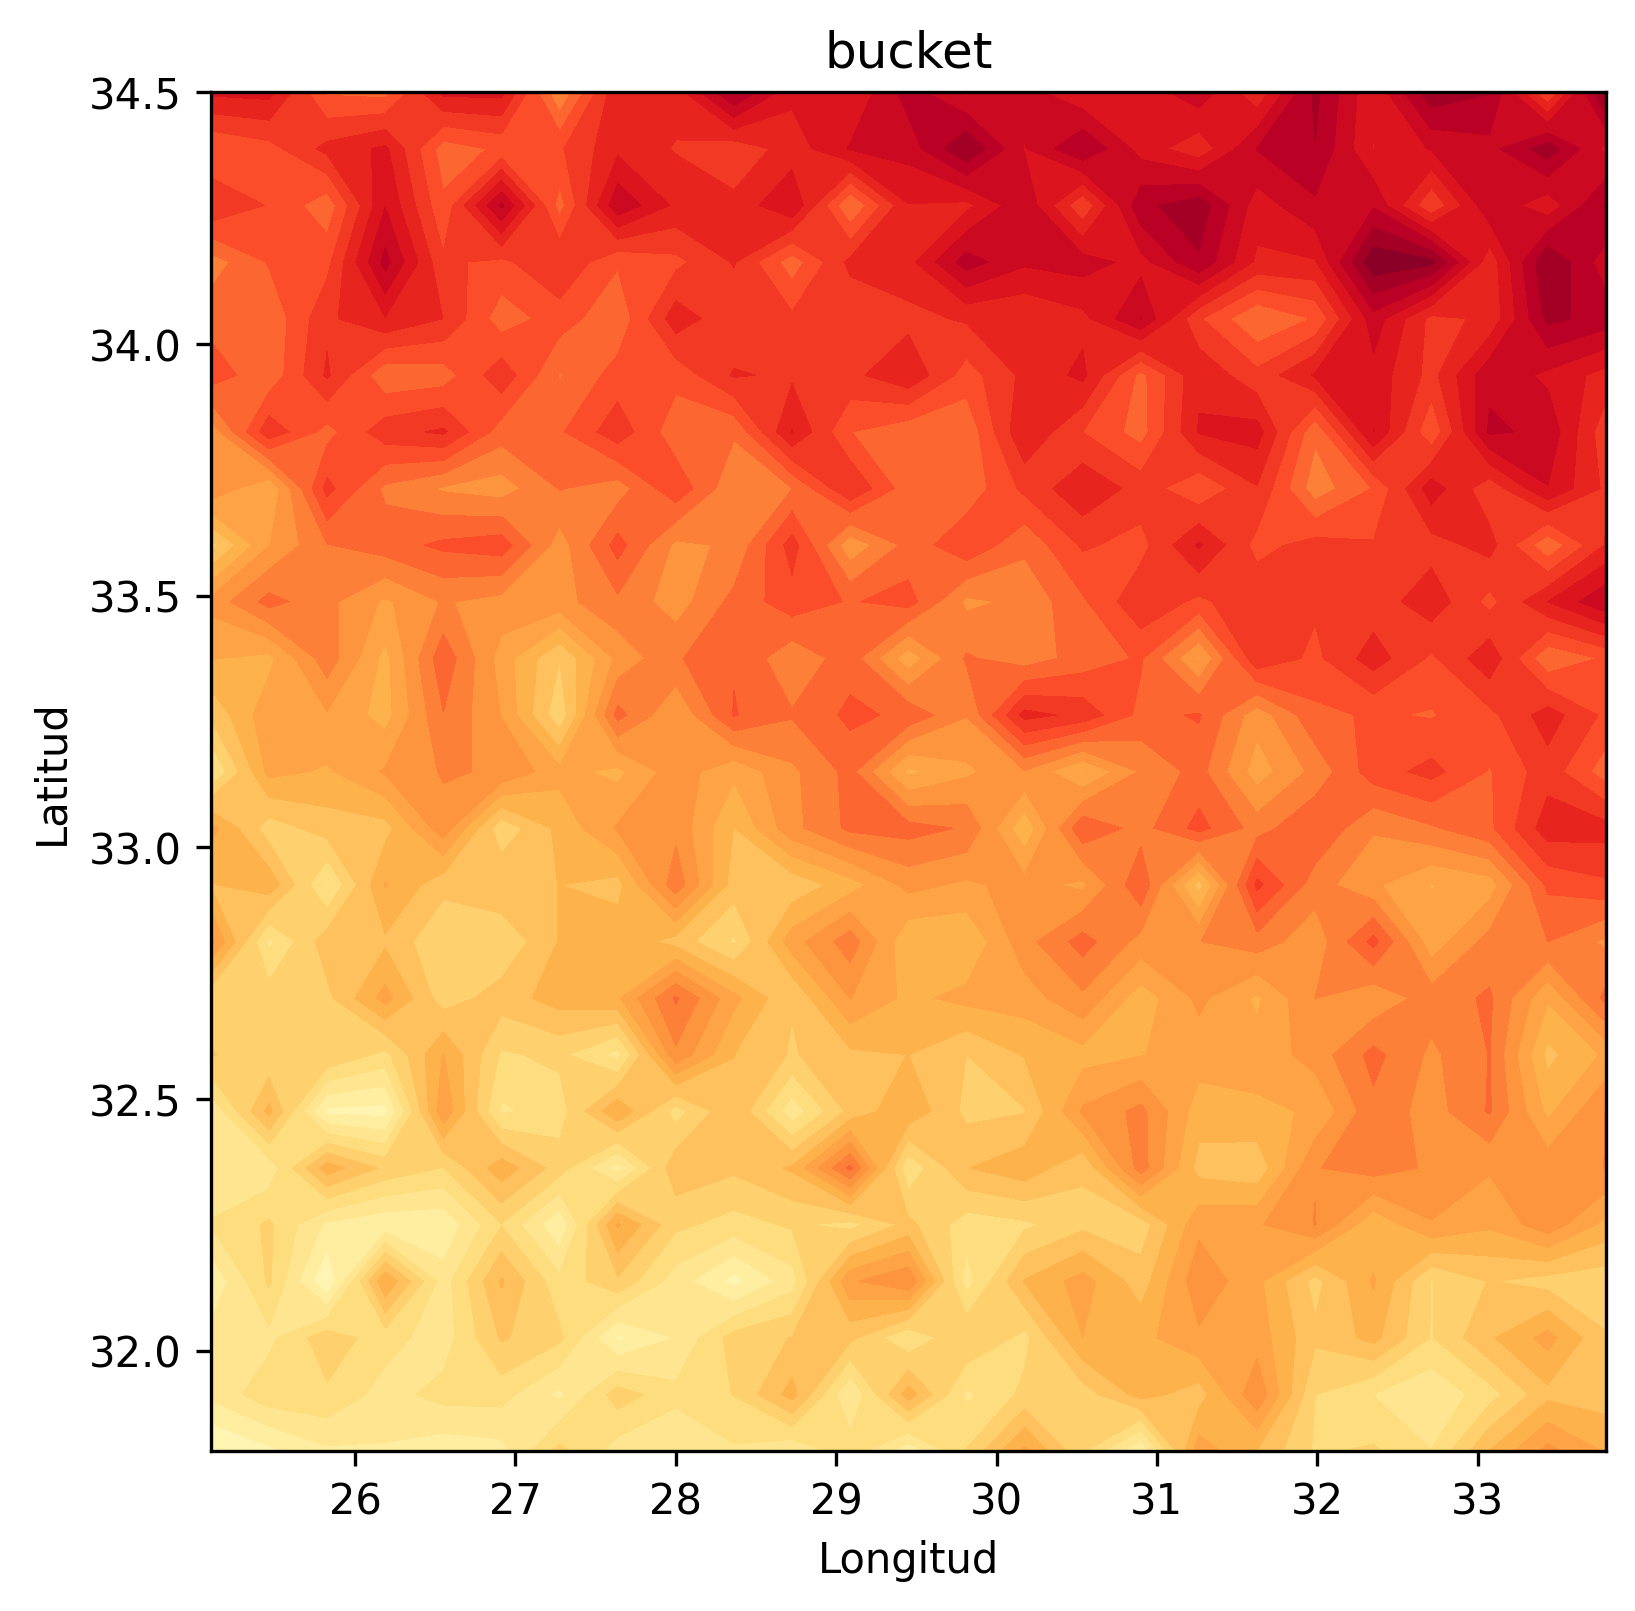

In [67]:
fig = plt.figure(figsize = (6,6), dpi = 300)
ax = fig.add_subplot(111)

ax.contourf(gx,gy,np.mean(z1,axis = 2),cmap = 'YlOrRd',levels = 20)
ax.set_ylabel('Latitud')
ax.set_xlabel('Longitud')
ax.set_title('bucket')

plt.show()

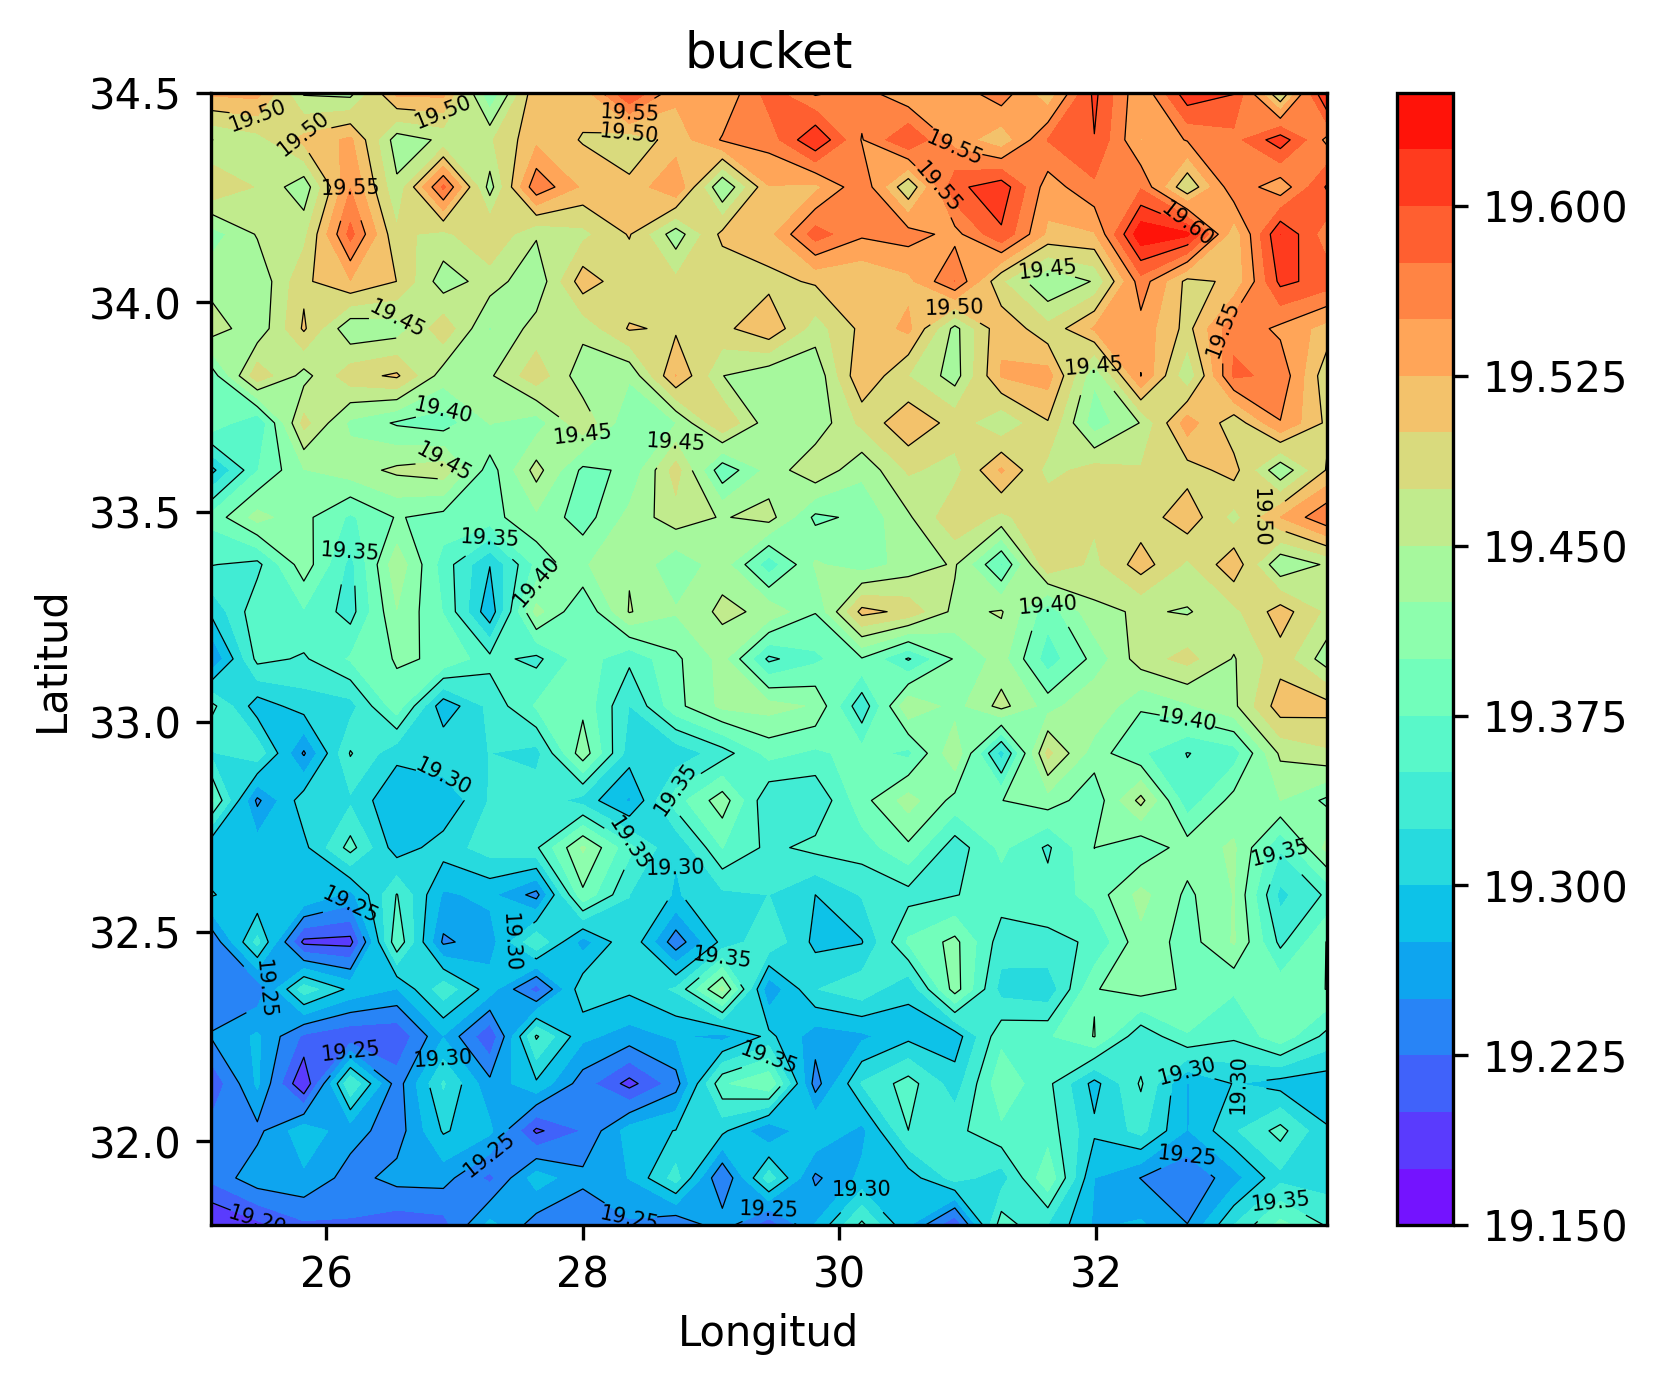

In [68]:
fig = plt.figure(figsize = (6,5), dpi = 300)
ax = fig.add_subplot(111)

c1 = ax.contourf(gx,gy,np.mean(z1,axis = 2),cmap = 'rainbow',levels = 20)
c2 = ax.contour(gx,gy,np.mean(z1,axis = 2),colors = 'black',linewidths = 0.3,levels = 10)
ax.clabel(c2,inline = 1, fontsize = 5)
plt.colorbar(c1)

ax.set_ylabel('Latitud')
ax.set_xlabel('Longitud')
ax.set_title('bucket')

plt.show()

### 7.9 Errores Cuadrático Medio

In [69]:
# estimación
zz1 = np.mean(z1,axis = 2)
zz2 = np.mean(z2,axis = 2)
zz3 = np.mean(z3,axis = 2)
zz4 = np.mean(z4,axis = 2)

In [70]:
# error cuadratico medio respecto a la temperatura promedio
yb = np.sum(y*nj)/np.sum(nj)
tab = pd.DataFrame({
    'Media' : [np.mean(zz1), np.mean(zz2), np.mean(zz3), np.mean(zz4)],
    'RMSE'  : [np.sqrt(np.sum((zz1-yb)**2)/zz1.size),
               np.sqrt(np.sum((zz2-yb)**2)/zz2.size),
               np.sqrt(np.sum((zz3-yb)**2)/zz3.size),
               np.sqrt(np.sum((zz4-yb)**2)/zz4.size)],
    'n disp': [m1,m2,m3,m4],
    'n total': [np.sum(df1.n),np.sum(df2.n),np.sum(df3.n),np.sum(df4.n)]
}, index = ['bucket','eri','d.buoy','f.buoy'])
round(tab,2)

Media  RMSE  n disp  n total
bucket  19.40  0.57      36       36
eri     19.72  0.51      35       39
d.buoy  19.91  0.35      10       21
f.buoy  22.66  3.25       5      240

In [71]:
# National Oceanic and Atmospheric Administration (NOAA)
# error cuadratico medio respecto a NOAA en 2012
yb = 22.44
tab = pd.DataFrame({
    'Media' : [np.mean(zz1), np.mean(zz2), np.mean(zz3), np.mean(zz4)],
    'RMSE'  : [np.sqrt(np.sum((zz1-yb)**2)/zz1.size),
               np.sqrt(np.sum((zz2-yb)**2)/zz2.size),
               np.sqrt(np.sum((zz3-yb)**2)/zz3.size),
               np.sqrt(np.sum((zz4-yb)**2)/zz4.size)],
    'n disp': [m1,m2,m3,m4],
    'n total': [np.sum(df1.n),np.sum(df2.n),np.sum(df3.n),np.sum(df4.n)]
}, index = ['bucket','eri','d.buoy','f.buoy'])
round(tab,2)

Media  RMSE  n disp  n total
bucket  19.40  3.04      36       36
eri     19.72  2.75      35       39
d.buoy  19.91  2.55      10       21
f.buoy  22.66  1.83       5      240

## Referencias

<img src="Hoffcoverbook.jpg" width = 250 />

<img src="Gelmancoverbook.png" width = 250 />

<img src="Reichcoverbook.jpg" width = 250 />